# IE0005 Cardiovascular Disease Detection Model

Dataset from Kaggle : **"Cardiovascular Disease dataset"** by *SVETLANA ULIANOVA*  
Source: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data

---

### Contributors (Team Panda)

- **Liu Yuheng**: content 1-7
- **Su Rui**: content 8-11 + editing of other sections
- **Nichani Namya Ashok**: content 8-11 + editing of other sections
- **Karen Natalie**: content 12-13 + troubleshooting of other sections + improvements after presentation feedback


### **Content Page**

01. [About Dataset](#dataset)

02. [Problem Statement](#prob)

03. [Importing Libraries](#lib)

04. [Data Preparation](#prep)

05. [Numerical Data Visualization](#num)

06. [Categorical Data Visualization](#cat)

07. [Data Manipulation](#mani)

08. [Female Without Outliers](#fwo)

09. [Female With Outliers](#fo)

10. [Male Without Outliers](#mwo)

11. [Male With Outliers](#mo)

12. [Analysis on Test Set](#test)

13. [Conclusion](#conc)

<a id='dataset'></a>
### About Dataset
**Data description** <br>
There are 3 types of input features:

1. Objective: factual information;
0. Examination: results of medical examination;
0. Subjective: information given by the patient.

**Features:**
1. Age | Objective Feature | age | int (days) |
1. Height | Objective Feature | height | int (cm) |
1. Weight | Objective Feature | weight | float (kg) |
1. Gender | Objective Feature | gender | categorical code |
1. Systolic blood pressure | Examination Feature | ap_hi | int |
1. Diastolic blood pressure | Examination Feature | ap_lo | int |
1. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
1. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
1. Smoking | Subjective Feature | smoke | binary |
1. Alcohol intake | Subjective Feature | alco | binary |
1. Physical activity | Subjective Feature | active | binary |
1. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

<a id='prob'></a>
# Problem Statement
How can we predict cardiovascular disease using a **gender-based** model?

<a id='lib'></a>
# Importing Libraries

In [1]:
# Importing Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() # set the default Seaborn style for graphics

<a id='prep'></a>
# Data Preparation

In [2]:
# Importing dataset
cvd_df = pd.read_csv('cardio.csv', sep = ';')

# Simple showcase of dataset
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [3]:
# Drop duplicates in case there has been double entries etc
cvd_df = cvd_df.drop_duplicates()

# Drop ID column as pandas dataframe has its own index
cvd_df.drop('id',axis=1,inplace=True)

# Change age into years for better visualisation, keep to 1dp
cvd_df['age'] = round((cvd_df['age'] / 365), 1)

cvd_df.head(3)

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0  50.4       2     168    62.0    110     80            1     1      0     0   
1  55.4       1     156    85.0    140     90            3     1      0     0   
2  51.7       1     165    64.0    130     70            3     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1

In [4]:
cvd_df.describe().round(2)

age    gender    height    weight     ap_hi     ap_lo  \
count  70000.00  70000.00  70000.00  70000.00  70000.00  70000.00   
mean      53.34      1.35    164.36     74.21    128.82     96.63   
std        6.76      0.48      8.21     14.40    154.01    188.47   
min       29.60      1.00     55.00     10.00   -150.00    -70.00   
25%       48.40      1.00    159.00     65.00    120.00     80.00   
50%       54.00      1.00    165.00     72.00    120.00     80.00   
75%       58.40      2.00    170.00     82.00    140.00     90.00   
max       65.00      2.00    250.00    200.00  16020.00  11000.00   

       cholesterol      gluc     smoke      alco   active   cardio  
count     70000.00  70000.00  70000.00  70000.00  70000.0  70000.0  
mean          1.37      1.23      0.09      0.05      0.8      0.5  
std           0.68      0.57      0.28      0.23      0.4      0.5  
min           1.00      1.00      0.00      0.00      0.0      0.0  
25%           1.00      1.00      0.00      0.00      1.0      0.0  
50%           1.00      1.00      0.00      0.00      1.0      0.0  
75%           2.00      1.00      0.00      0.00      1.0      1.0  
max           3.00      3.00      1.00      1.00      1.0      1.0

From the above data description, we notice that there are unrealistic values appearing in ap_hi and ap_lo. Therefore, we will set a range of ap_hi and ap_lo according to realistic values from other studies and filter out rows that has values outside of the range below.
- range: 1 - 370 (since 370 is the highest ever recorded blood pressure)
- ap_hi > ap_lo for the same person

In [5]:
# Filter
condition = ((cvd_df["ap_hi"]<370 )&(cvd_df["ap_hi"]>1) & (cvd_df["ap_lo"]<370)&(cvd_df["ap_lo"]>1) & (cvd_df["ap_hi"]>cvd_df["ap_lo"]))
unrealistic = cvd_df[~condition]["age"].count()
print(f"{unrealistic} unrealistic data removed")

cvd_df = cvd_df[condition]
cvd_df.describe().round(2)

1292 unrealistic data removed


age    gender    height    weight     ap_hi     ap_lo  \
count  68708.00  68708.00  68708.00  68708.00  68708.00  68708.00   
mean      53.33      1.35    164.36     74.12    126.67     81.27   
std        6.76      0.48      8.19     14.33     16.71      9.57   
min       29.60      1.00     55.00     11.00     16.00      6.00   
25%       48.40      1.00    159.00     65.00    120.00     80.00   
50%       54.00      1.00    165.00     72.00    120.00     80.00   
75%       58.40      2.00    170.00     82.00    140.00     90.00   
max       65.00      2.00    250.00    200.00    240.00    182.00   

       cholesterol      gluc     smoke      alco   active    cardio  
count     68708.00  68708.00  68708.00  68708.00  68708.0  68708.00  
mean          1.36      1.23      0.09      0.05      0.8      0.49  
std           0.68      0.57      0.28      0.22      0.4      0.50  
min           1.00      1.00      0.00      0.00      0.0      0.00  
25%           1.00      1.00      0.00      0.00      1.0      0.00  
50%           1.00      1.00      0.00      0.00      1.0      0.00  
75%           2.00      1.00      0.00      0.00      1.0      1.00  
max           3.00      3.00      1.00      1.00      1.0      1.00

<a id='num'></a>
# Numerical Data Visualization

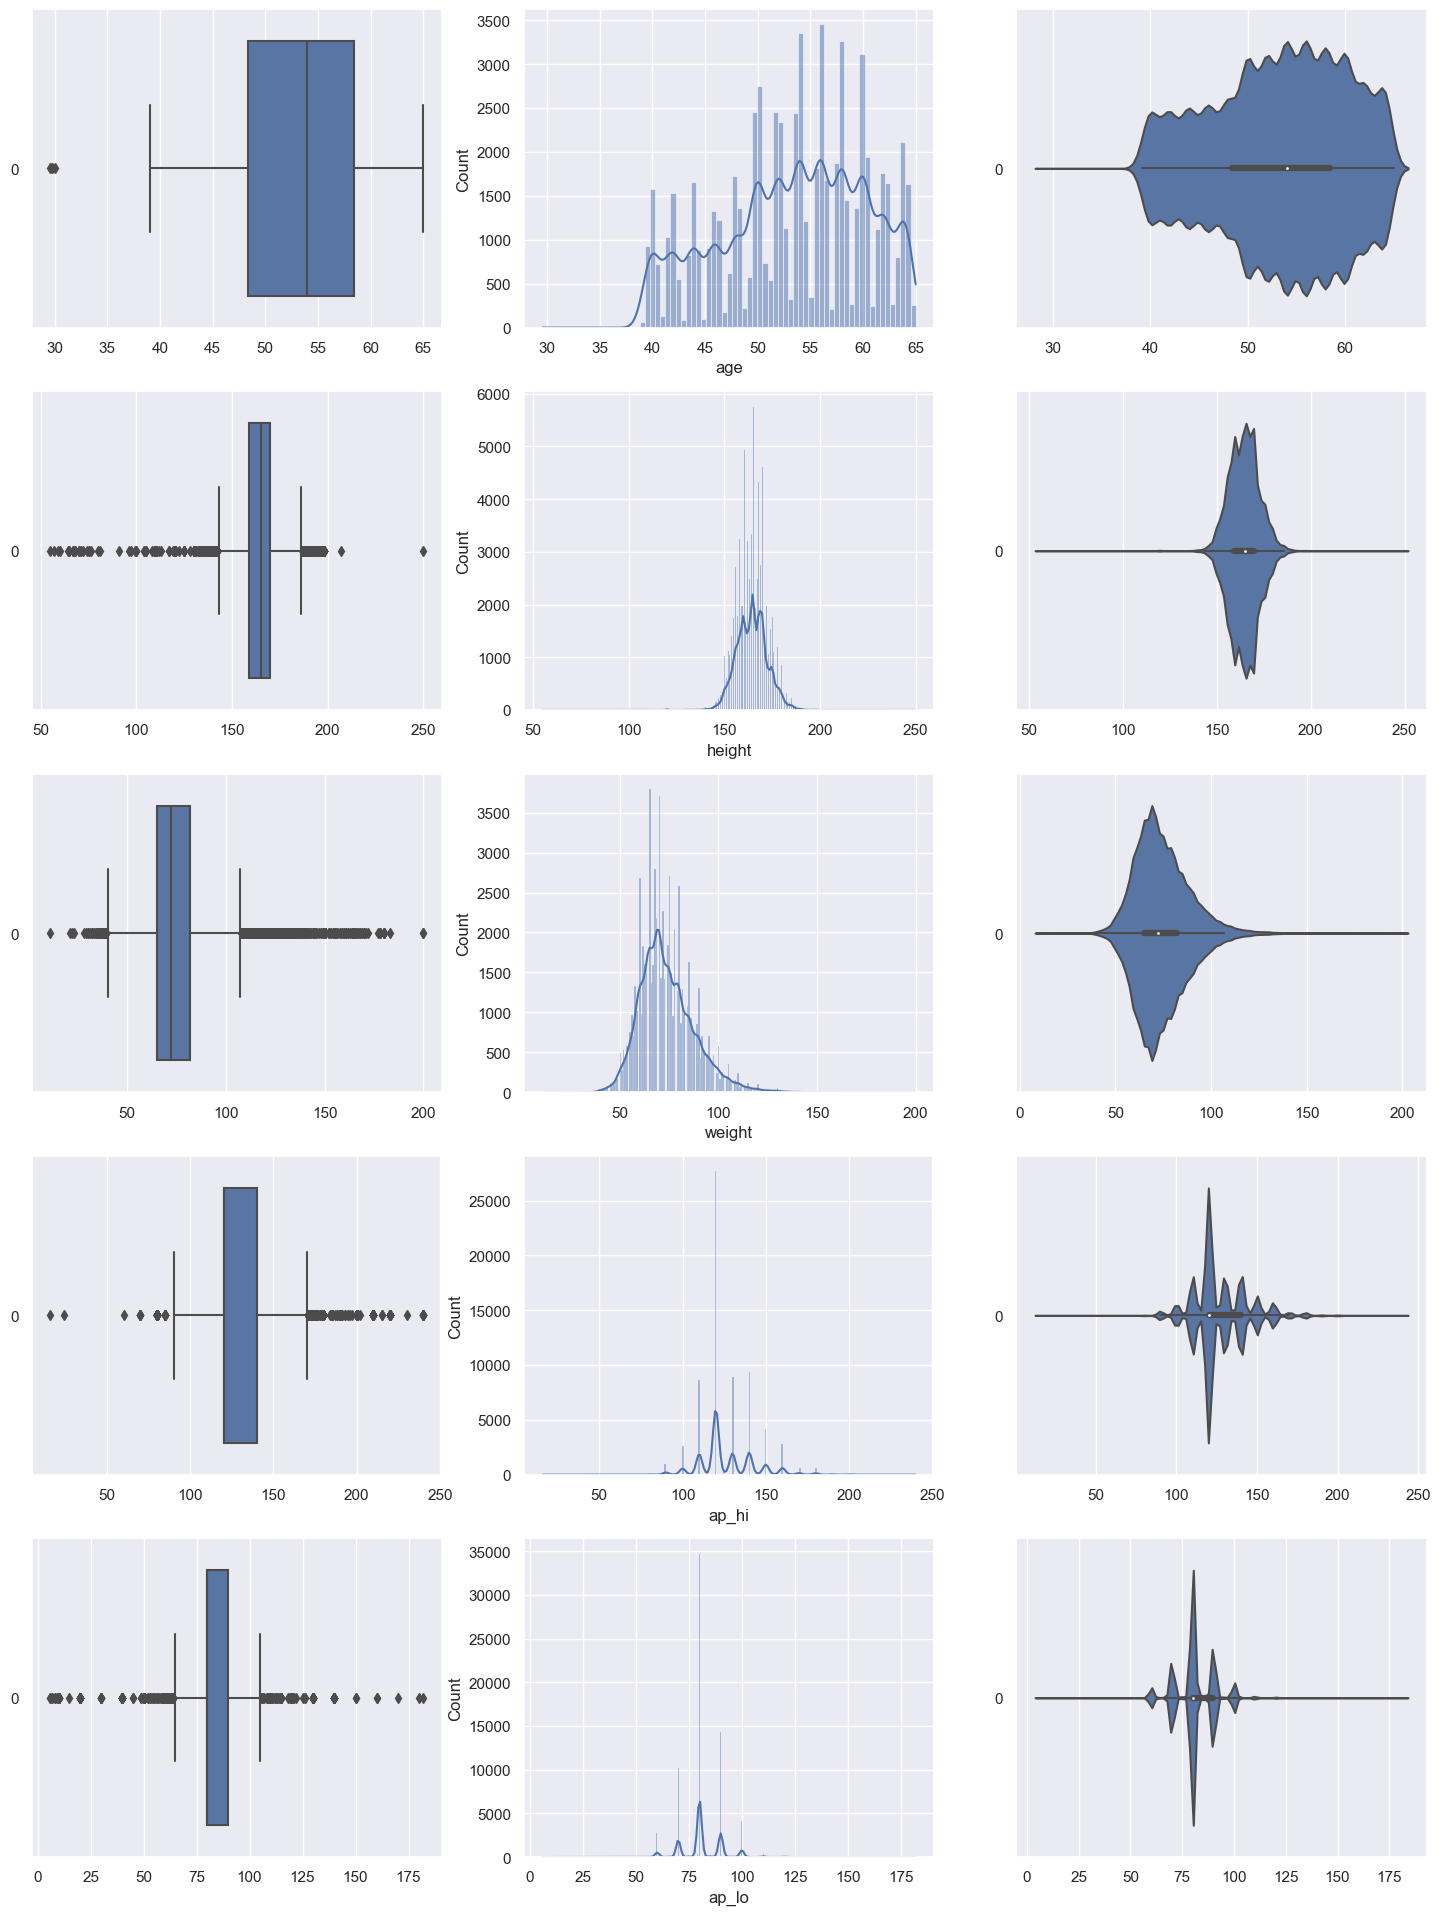

In [6]:
# Draw the distributions of all numerical variables
f, axes = plt.subplots(5, 3, figsize=(18, 24))

count = 0
cols = ['age', 'height','weight', 'ap_hi', 'ap_lo']
for var in cols:
    sb.boxplot(data = cvd_df[var], orient = "h", ax = axes[count,0])
    sb.histplot(x = cvd_df[var], ax = axes[count,1],kde=True)
    sb.violinplot(data = cvd_df[var], orient = "h", ax = axes[count,2])
    count += 1

From the above graphs we notice that there are many outliers that are far from the mean. These data points may either be wrong or represent very unique individuals. Hence, we expect our trained model to have better performance when outliers are filtered out.

<Axes: >

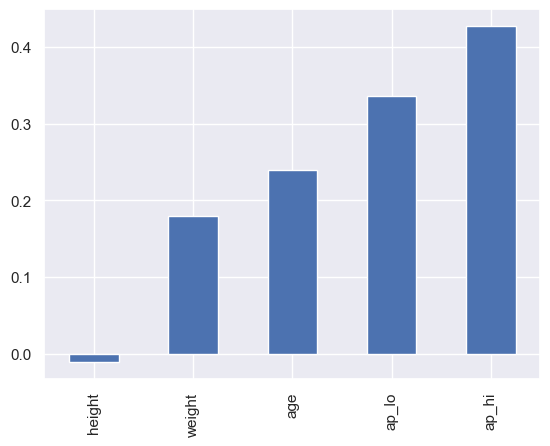

In [7]:
# Include interested columns
cvd_df_vars = pd.DataFrame(cvd_df[cols + ['cardio']])
data = cvd_df_vars.corr()

# Plot correlation with cardio
data['cardio'].sort_values()[:-1].plot(kind='bar')

From the correlation plot, we observed the following:
- Moderate positive correlation (0.3, 0.5] - ap_hi
- Low positive correlation (0.1-0.3] - weight, age, ap_lo
- No correlation (near zero) - height

Height and weight data can be used to calculate Body Mass Index or BMI for better representation of personal health status, and account for differences in body composition based on gender. 

<a id='cat'></a>
# Categorical Data Visualization

In [8]:
#Display countplots for all categorical data
fig, axes = plt.subplots(2, 3, figsize = (15,8))
for counter, var in enumerate(['gender', 'cholesterol','gluc','smoke', 'alco', 'active']):
    sb.countplot(x=var, hue='cardio', data=cvd_df[[var, 'cardio']], ax = axes[counter//3 , counter%3])

**gender**:
The data is not balanced- number of female data is about 2 times that of male, but not much relation could be observed between cardiovascular disease and gender<br>
**cholesterol**:
The samples with cardiovascular disease have distinctly higher cholesterol level<br>
**gluc**:
The samples with cardiovascular disease have slightly higher glucose level<br>
**smoke**:
A high percentage of data collected are from non smokers, but not much relation could be observed between cardiovascular disease and smoking<br>
**alco**:
A high percentage of data collected are from non drinkers, but not much relation could be observed between cardiovascular disease and alcohol consumption<br>
**active**:
More samples with cardiovascular disease are not active 

<Axes: >

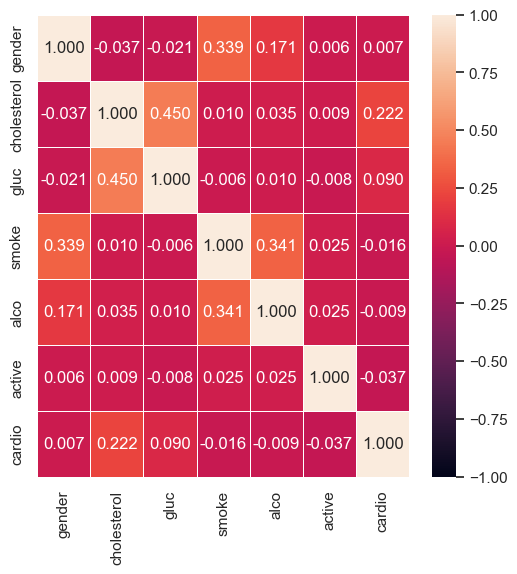

In [9]:
#correlation heatmap of categorical variables
f = plt.figure(figsize=(6, 6))
sb.heatmap(cvd_df[['gender', 'cholesterol','gluc','smoke', 'alco', 'active', 'cardio']].corr(), vmin = -1, vmax = 1, annot = True, fmt = ".3f", linewidths=.5)

With reference to the target variable (cardio), cholesterol has the highest correlation of 0.22 (low positive correlation) followed by glucose at 0.090.<br>
The rest of the variables have nearly no correlation. This fact aligns with the conclusion from the count plot above.<br>
Based on scientific research, cholesterol is a key indicator of cardiovascular disease. Therefore, such correlation is expected. Further analysis is needed to explore the relationship between risk of cardiovascular disease and these categorical variables.

In [10]:
# Catplot of cardio
sb.catplot(x = "cardio", data = cvd_df, kind = "count", height = 4)

From the catplots, we concluded that the data is balanced in whether the samples have cardiovascular disease. <br>

<a id='mani'></a>
# Data Manipulation

### Inclusion of Body Mass Index (BMI)
As mentioned before, height does not have much relation with cardiovascular disease. Individually, height and weight also do not represent body health. Therefore, we will make use of both variables (height and weight) to calculate body mass index (BMI) of each person and use this value instead for further analytics. <br>

The formula is BMI = kg/m^2 where kg is a person’s weight in kilograms and m^2 is their height in metres square.

In [11]:
# Calculate and include BMI for all rows
cvd_df["bmi"] = round((cvd_df["weight"] / (cvd_df['height']/100)**2), 1)
cvd_df.head(3)

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0  50.4       2     168    62.0    110     80            1     1      0     0   
1  55.4       1     156    85.0    140     90            3     1      0     0   
2  51.7       1     165    64.0    130     70            3     1      0     0   

   active  cardio   bmi  
0       1       0  22.0  
1       1       1  34.9  
2       0       1  23.5

<Axes: >

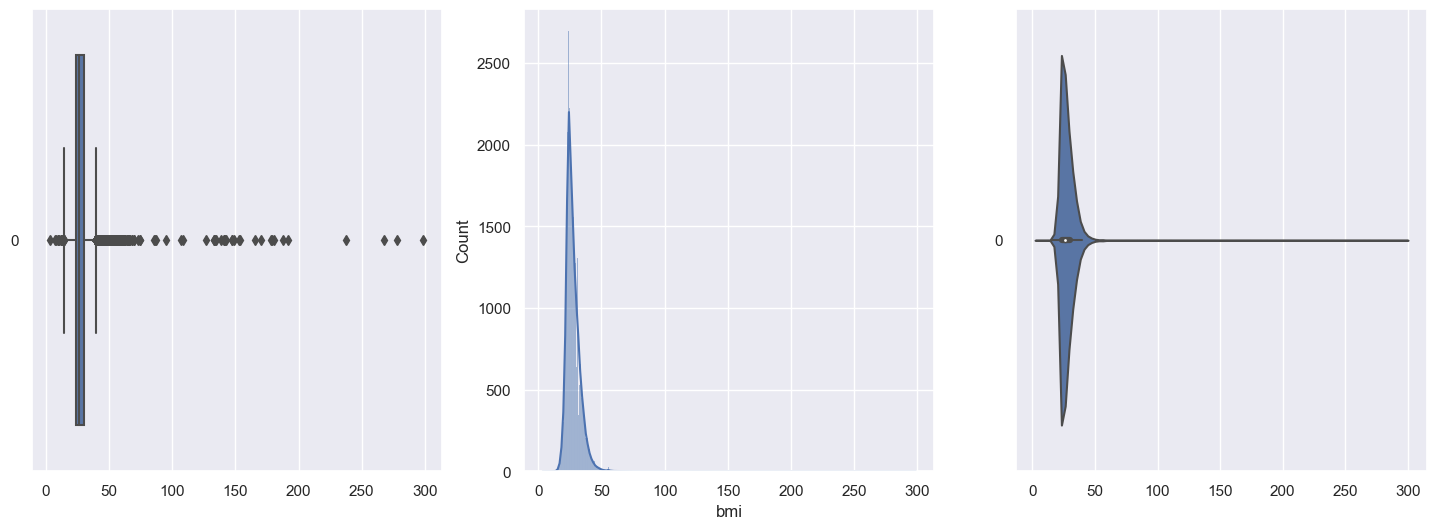

In [12]:
#Basic visualisation of bmi
f, axes = plt.subplots(1, 3, figsize=(18, 6))

sb.boxplot(data = cvd_df['bmi'], orient = "h", ax = axes[0])
sb.histplot(x = cvd_df['bmi'], ax = axes[1],kde=True)
sb.violinplot(data = cvd_df['bmi'], orient = "h", ax = axes[2])

Some outliers can be observed. These outliers may be due to the outliers in weight and height.

In [13]:
# Analysis of bmi across gender
# Create a joint dataframe by concatenating bmi and gender
jointDF_bmi_gender = pd.concat([cvd_df['bmi'], cvd_df['gender']], axis = 1).reindex(cvd_df['bmi'].index)

# Joint Boxplot of gender against bmi
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "bmi", y = "gender", data = jointDF_bmi_gender, orient = "h")

<Axes: xlabel='bmi', ylabel='gender'>

The boxplot visualisations of BMI and gender showed that males tend to have a lower BMI overall, while females have a much larger spread of BMI (likely due to greater number of data values) and a slightly higher mean. 

In [14]:
# analysis of cardio against bmi
# Create a joint dataframe by concatenating bmi and cardio
jointDF_bmi_cardio = pd.concat([cvd_df['bmi'], cvd_df['cardio']], axis = 1).reindex(cvd_df['bmi'].index)

# Joint Boxplot of cardio against bmi 
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "bmi", y = "cardio", data = jointDF_bmi_cardio, orient = "h")

<Axes: xlabel='bmi', ylabel='cardio'>

The boxplot visualisations of both variables did not yield any obvious relationships, as it appears that BMI seems to be similar for both cardiovascular patients and non-patients.


### Remove Outliers

For each column, we first compute the Z-score of each value relative to the column mean and standard deviation (We take the absolute Z-score as the direction does not matter). For each row, we check if all column values are within 3 standard deviations from the mean. If not, the value is considered as an outlier.

Only columns with numerical data is considered in this process.
For categorical data: since the data is measured in degrees (i.e. 1, 2, 3), rows with one specific degree may all be removed as outliers. 

Outliers removed represent individual data having a distinct difference with the normal.

In [15]:
# Import stats from scipy
from scipy import stats

In [16]:
# Remove Outliers by considering only the following columns
cols = ["age", "height", "weight", "ap_hi", "ap_lo", "bmi"]
cvd_df_no_outliers = cvd_df.copy(deep = True)
for col in cols:
    cvd_df_no_outliers = cvd_df_no_outliers[np.abs(stats.zscore(cvd_df_no_outliers[col])) < 3]

# Outliers removed
outliers = cvd_df['age'].count() - cvd_df_no_outliers['age'].count()
print(f'{outliers} outliers removed')
cvd_df_no_outliers.info()

2901 outliers removed
<class 'pandas.core.frame.DataFrame'>
Int64Index: 65807 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          65807 non-null  float64
 1   gender       65807 non-null  int64  
 2   height       65807 non-null  int64  
 3   weight       65807 non-null  float64
 4   ap_hi        65807 non-null  int64  
 5   ap_lo        65807 non-null  int64  
 6   cholesterol  65807 non-null  int64  
 7   gluc         65807 non-null  int64  
 8   smoke        65807 non-null  int64  
 9   alco         65807 non-null  int64  
 10  active       65807 non-null  int64  
 11  cardio       65807 non-null  int64  
 12  bmi          65807 non-null  float64
dtypes: float64(3), int64(10)
memory usage: 7.0 MB


### After Manipulation

<Axes: >

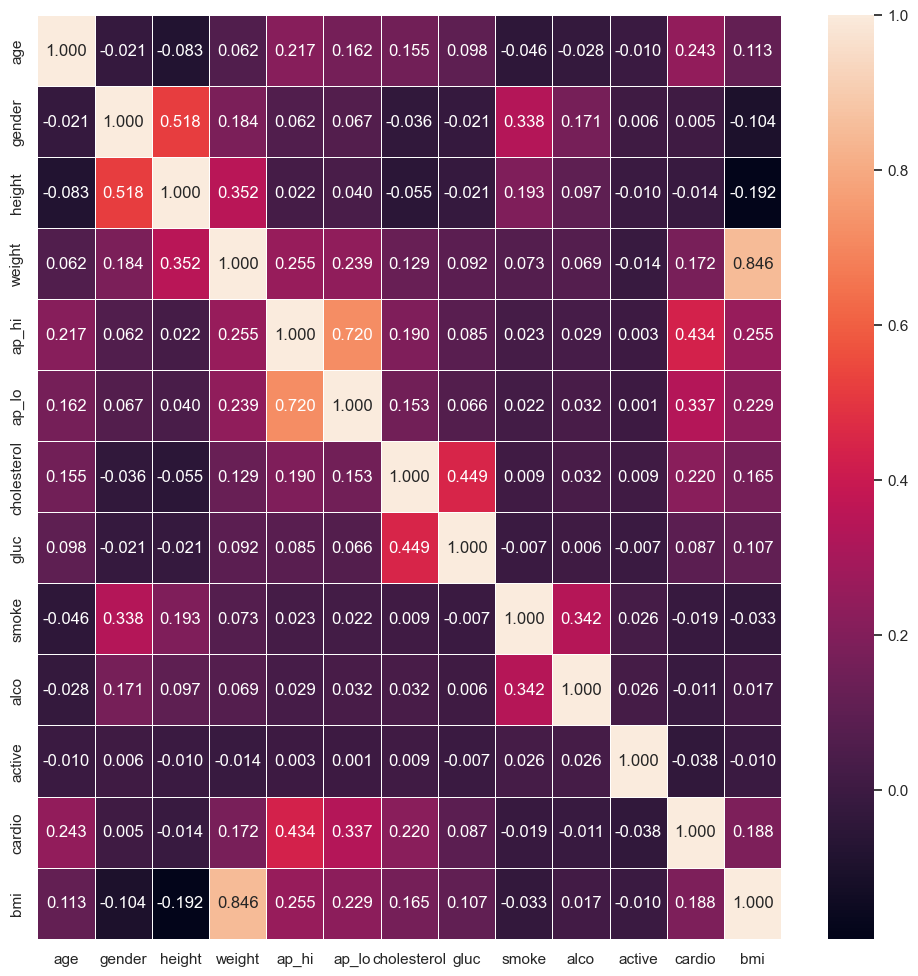

In [17]:
#Correlation heatmap of variables
f = plt.figure(figsize=(12, 12))
corr = cvd_df_no_outliers.corr()
sb.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5)

In [18]:
#Correlation of each variable with cardio
(corr['cardio'].sort_values()[:-1]).plot(kind='bar')

<Axes: >

### Split Dataset

We decide to first split dataset into train and test. Then, we further split the train set into gender specific datasets to develop distinct models for different genders.

This process will be repeated for both datasets (with and without outliers) to explore whether the removal of outliers is indeed effective.

Test ratio used: 0.25


#### Split into train and test

In [19]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

For data with outliers:

In [20]:
# Split the Dataset into Train and Test
model_train, model_test = train_test_split(cvd_df, test_size = 0.25)

In [21]:
# Save test dataset
model_test.to_csv('model_with_outliers_test.csv', sep = ',', index = False)

For data without outliers:

In [22]:
# Split the Dataset into Train and Test
model2_train, model2_test = train_test_split(cvd_df_no_outliers, test_size = 0.25)

In [23]:
# Save test dataset
model2_test.to_csv('model_without_outliers_test.csv', sep = ',', index = False)

#### Split  according to gender
In the dataset, female is represented by 1, male is represented by 2, the dtype is int64.

For data with outliers:

In [24]:
# Split model training dataset with outliers
female_df = model_train[model_train['gender'] == 1]
male_df = model_train[model_train['gender'] == 2]

In [25]:
# Save datasets
female_df.to_csv('female_with_outliers.csv', sep = ',', index = False)
male_df.to_csv('male_with_outliers.csv', sep = ',', index = False)

For data without outliers:

In [26]:
# Split model training dataset without outliers
female_df_no_outliers = model2_train[model2_train['gender'] == 1]
male_df_no_outliers = model2_train[model2_train['gender'] == 2]

In [27]:
# Save datasets
female_df_no_outliers.to_csv('female_without_outliers.csv', sep = ',', index = False)
male_df_no_outliers.to_csv('male_without_outliers.csv', sep = ',', index = False)

### Classification

#### Split  into train and test sets
We will further split the data into train and test in order to train our classification model.

In [28]:
female_without_outliers = pd.read_csv('female_without_outliers.csv')
female_without_outliers.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0  60.8       1     164    94.0    110     70            3     1      0     0   
1  59.6       1     167    73.0    110     80            1     1      0     0   
2  52.1       1     165    90.0    140     90            1     1      0     0   
3  62.2       1     158    77.0    120     80            1     1      0     0   
4  49.2       1     172    74.0    120     70            1     1      0     0   

   active  cardio   bmi  
0       1       1  34.9  
1       1       1  26.2  
2       1       1  33.1  
3       1       0  30.8  
4       0       0  25.0

In [29]:
female_with_outliers = pd.read_csv('female_with_outliers.csv')
female_with_outliers.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0  55.9       1     165    90.0    190    110            1     1      0     0   
1  61.4       1     172    65.0    120     70            1     1      0     0   
2  49.8       1     164    67.0    120     70            1     1      0     0   
3  47.9       1     163    78.0    140     90            3     1      0     0   
4  53.4       1     160    80.0    140     80            3     1      0     1   

   active  cardio   bmi  
0       1       1  33.1  
1       1       1  22.0  
2       1       0  24.9  
3       1       1  29.4  
4       1       1  31.2

In [30]:
male_without_outliers = pd.read_csv('male_without_outliers.csv')
male_without_outliers.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0  55.7       2     181    83.0    120     80            1     1      0     0   
1  55.8       2     178    77.0    120     80            1     1      0     0   
2  53.5       2     171    94.0    120     80            1     1      0     0   
3  46.0       2     172    80.0    120     70            1     1      0     0   
4  42.3       2     170    71.0    120     80            1     1      0     0   

   active  cardio   bmi  
0       1       0  25.3  
1       1       0  24.3  
2       1       1  32.1  
3       0       1  27.0  
4       1       0  24.6

In [31]:
male_with_outliers = pd.read_csv('male_with_outliers.csv')
male_with_outliers.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0  54.0       2     175    76.0    120     80            1     1      0     0   
1  62.6       2     172    85.0    160     90            2     1      0     0   
2  58.1       2     168    68.0    120     80            3     3      0     0   
3  47.7       2     163    80.0    160    100            2     1      0     0   
4  42.3       2     168    63.0    120     80            2     1      0     0   

   active  cardio   bmi  
0       1       0  24.8  
1       1       0  28.7  
2       1       1  24.1  
3       1       1  30.1  
4       1       0  22.3

---
<a id='fwo'></a>
# Female Without Outliers  
## Simple Decision Tree

We will start by setting up a simple Classification Problem by using ap_hi as it has the highest correlation with cardio.   

Response Variable : **cardio_fwo**     
Predictor Feature : **ap_hi_fwo** (systolic blood pressure)   

Extract the variables and the associated data as a Pandas `DataFrame`.

In [32]:
cardio_fwo = pd.DataFrame(female_without_outliers['cardio'])  # Response
ap_hi_fwo = pd.DataFrame(female_without_outliers['ap_hi'])    # Predictor

Set up the classification problem with Train and Test datasets.   
Test ratio = 0.25

In [33]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the Dataset into Train and Test
ap_hi_fwo_train, ap_hi_fwo_test, cardio_fwo_train, cardio_fwo_test = train_test_split(ap_hi_fwo, cardio_fwo, test_size = 0.25)

# Check the sample sizes
print("Train Set :", ap_hi_fwo_train.shape, cardio_fwo_train.shape)
print("Test Set  :", ap_hi_fwo_test.shape, cardio_fwo_test.shape)

Train Set : (24048, 1) (24048, 1)
Test Set  : (8017, 1) (8017, 1)


#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [34]:
# Summary Statistics for cardio_fwo Train
cardio_fwo_train["cardio"].value_counts()

0    12367
1    11681
Name: cardio, dtype: int64

In [35]:
# Summary Statistics for ap_hi_fwo Train
ap_hi_fwo_train.describe()

ap_hi
count  24048.000000
mean     124.913631
std       15.246055
min       80.000000
25%      120.000000
50%      120.000000
75%      130.000000
max      176.000000

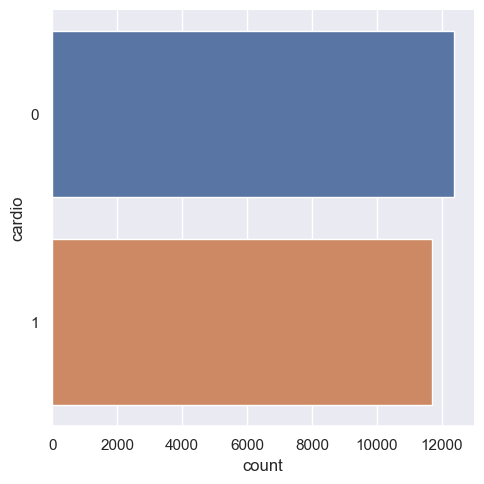

In [36]:
# Count Plot for cardio_fwo Train
sb.catplot(y = "cardio", data = cardio_fwo_train, kind = "count")

<Axes: >

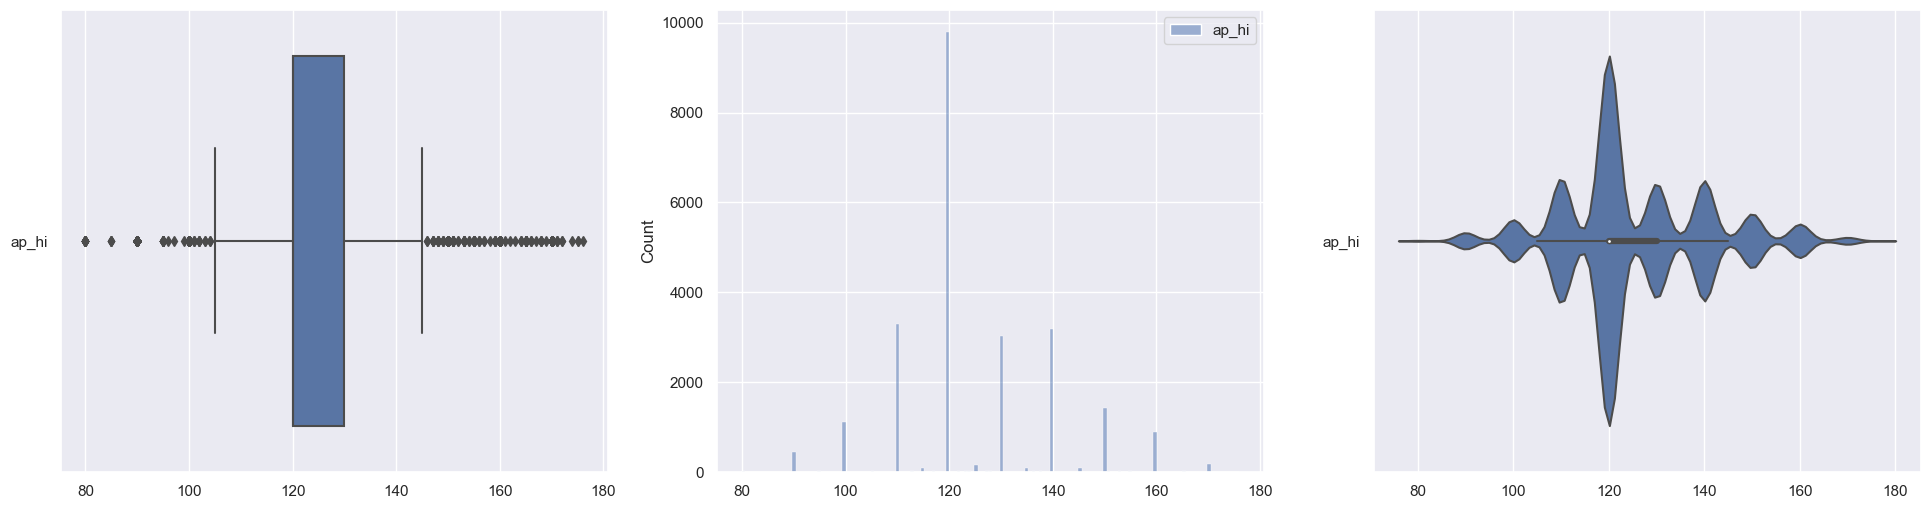

In [37]:
# Plot the distributions of ap_hi_fwo Train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = ap_hi_fwo_train, orient = "h", ax = axes[0])
sb.histplot(data = ap_hi_fwo_train, ax = axes[1])
sb.violinplot(data = ap_hi_fwo_train, orient = "h", ax = axes[2])

<Axes: xlabel='ap_hi', ylabel='cardio'>

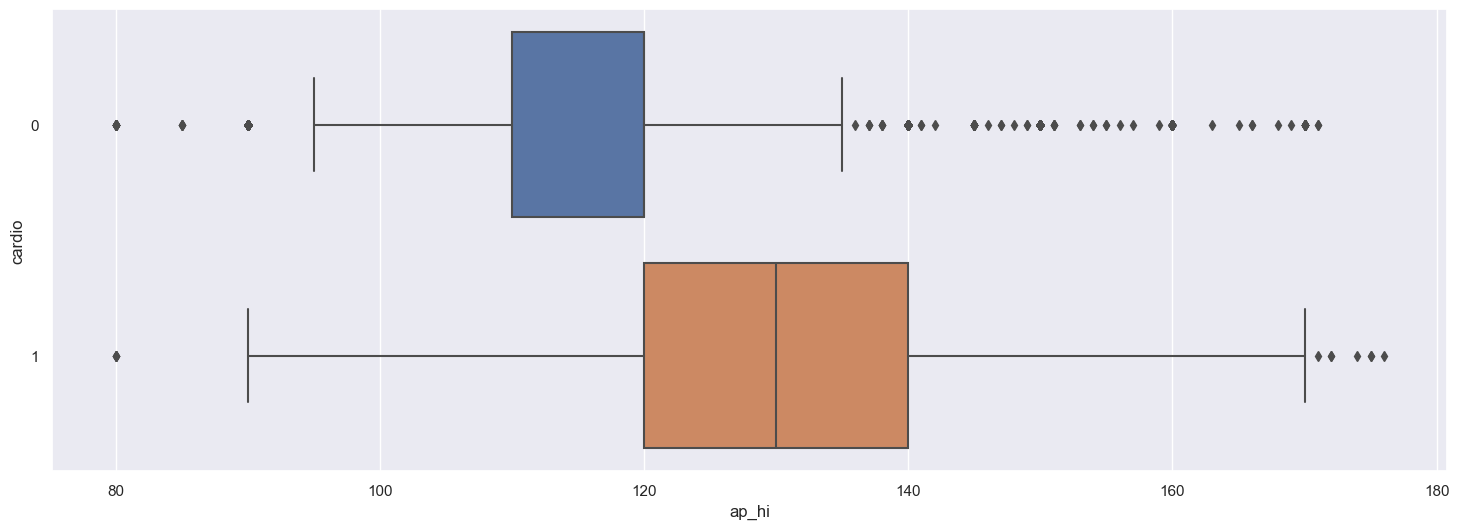

In [38]:
# Create a joint dataframe by concatenating ap_hi and cardio
trainDF_fwo = pd.concat([ap_hi_fwo_train, cardio_fwo_train], axis = 1).reindex(ap_hi_fwo_train.index)

# Joint Boxplot of cardio Train against ap_hi Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "ap_hi", y = "cardio", data = trainDF_fwo, orient = "h")

#### Decision Tree in Scikit-Learn


In [39]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

# Recall the cardio-ap_hi Dataset
cardio_fwo = pd.DataFrame(female_without_outliers['cardio'])   # Response
ap_hi_fwo = pd.DataFrame(female_without_outliers['ap_hi'])       # Predictor

# Split the cardio-ap_hi Dataset into Train and Test
ap_hi_fwo_train, ap_hi_fwo_test, cardio_fwo_train, cardio_fwo_test = train_test_split(ap_hi_fwo, cardio_fwo, test_size = 0.25)

In [40]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

Train the Decision Tree Classifier model `dectree` using the Train Set.   
Use `ap_hi_fwo_train` as *Predictor* and `cardio_fwo_train` as *Response*.

In [41]:
# Train the Decision Tree Classifier model
dectree.fit(ap_hi_fwo_train, cardio_fwo_train)

DecisionTreeClassifier(max_depth=2)

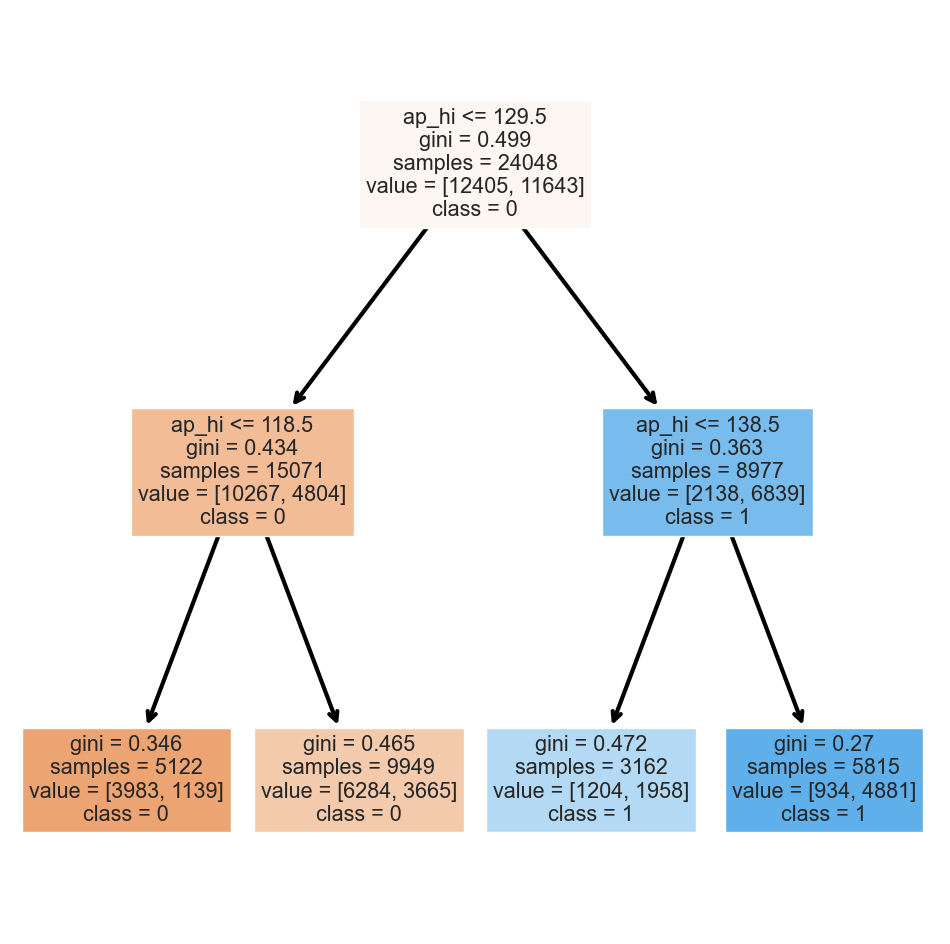

In [42]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = ap_hi_fwo_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

#### Goodness of Fit of the Model

Check how good the predictions are on the Train Set.    
Metrics : Classification Accuracy, Confusion Matrix and True Positive Rate.

Classification Accuracy 	: 0.7113273453093812


<Axes: >

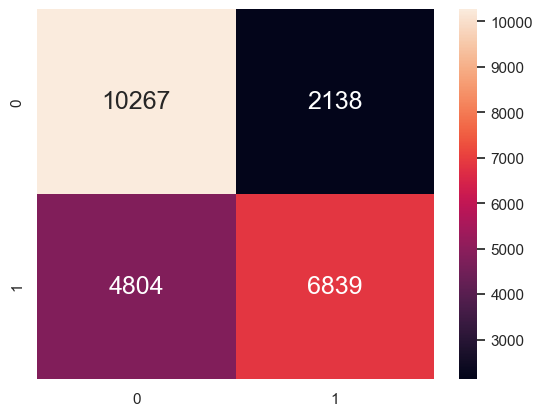

In [43]:
# Predict cardio corresponding to ap_hi train
cardio_fwo_train_pred = dectree.predict(ap_hi_fwo_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(ap_hi_fwo_train, cardio_fwo_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(cardio_fwo_train, cardio_fwo_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

- TP: Correct prediction on one having cardiovascular disease
- TN: Correct prediction on one not having cardiovascular disease
- FP: One with no cardiovascular disease but predicted to have
- FN: One with cardiovascular disease but predicted to not have

It is important to not miss any potential cardiovascular disease patient. Thus, we calculate the False Negative Rate (FNR) and the Recall (True Positive Rate - TPR).

FNR (Calculated in slides presentation due to changing values of dataset after splitting) = FN / (FN + TP) <br>
TPR (Calculated below) = TP / (TP + FN)

In [44]:
print("Recall (True Positive Rate) Score: ", recall_score(cardio_fwo_train, cardio_fwo_train_pred))

Recall (True Positive Rate) Score:  0.5873915657476595


#### Check prediction accuracy on the Test Set.    
Metrics : Classification Accuracy, Confusion Matrix and True Positive Rate.

Classification Accuracy 	: 0.7230884370712236
Recall (True Positive Rate) Score:  0.6063301072456186


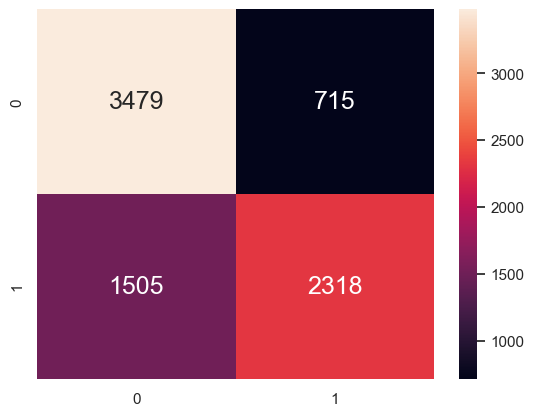

In [45]:
# Predict cardio corresponding to ap_hi Test
cardio_fwo_test_pred = dectree.predict(ap_hi_fwo_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(ap_hi_fwo_test, cardio_fwo_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(cardio_fwo_test, cardio_fwo_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#Print the TPR
print("Recall (True Positive Rate) Score: ", recall_score(cardio_fwo_test, cardio_fwo_test_pred))

## Chi-Square Test of Independence

Since the correlation matrix for the categorical variables did not yield strong observations, we will conduct the Chi Square Test of Independence to analyse the remaining categorical data that have not been covered in the classification tree, in order to see which categorical data is important in predicting the likelihood of cardiovascular disease. The categorical data to be explored are Cholesterol, Glucose, Smoke, Alcohol, Active.

In [46]:
# importing packages 
import scipy.stats as stats
import researchpy as rp

#Create a crosstab of cholesterol and cardio
crosstab_fwo = pd.crosstab(female_without_outliers["cholesterol"], female_without_outliers["cardio"])
crosstab_fwo

cardio           0      1
cholesterol              
1            13800  10083
2             1905   2503
3              894   2880

In [47]:
#Run the chi square test and print the result
crosstab_fwo, test_results_fwo, expected_fwo = rp.crosstab(female_without_outliers["cholesterol"], female_without_outliers["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_fwo

Chi-square test    results
0  Pearson Chi-square ( 2.0) =   1666.7607
1                    p-value =      0.0000
2                 Cramer's V =      0.2280

In [48]:
#Chi square test for glucose and cardio
crosstab_fwo = pd.crosstab(female_without_outliers["gluc"], female_without_outliers["cardio"])
crosstab_fwo, test_results_fwo, expected_fwo = rp.crosstab(female_without_outliers["gluc"], female_without_outliers["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_fwo

Chi-square test   results
0  Pearson Chi-square ( 2.0) =   291.1112
1                    p-value =     0.0000
2                 Cramer's V =     0.0953

In [49]:
#Chi square test for smoke and cardio
crosstab_fwo = pd.crosstab(female_without_outliers["smoke"], female_without_outliers["cardio"])
crosstab_fwo, test_results_fwo, expected_fwo = rp.crosstab(female_without_outliers["smoke"], female_without_outliers["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_fwo

Chi-square test  results
0  Pearson Chi-square ( 1.0) =    3.0494
1                    p-value =    0.0808
2               Cramer's phi =    0.0098

Note: For this fwo dataset, the chi square test for smoke and cardio produced inconsistent results after repeated runs (fluctuating from ~0.02 to ~0.06). When smoke was included (later on) in the multivariate decision tree, there were no significant improvements in classification accuracy as well. As such, smoke will not be considered as a significant variable.

In [50]:
#Chi square test for alcohol and cardio
crosstab_fwo = pd.crosstab(female_without_outliers["alco"], female_without_outliers["cardio"])
crosstab_fwo, test_results_fwo, expected_fwo = rp.crosstab(female_without_outliers["alco"], female_without_outliers["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_fwo

Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.5804
1                    p-value =    0.4462
2               Cramer's phi =    0.0043

In [51]:
#Chi square test for active and cardio
crosstab_fwo = pd.crosstab(female_without_outliers["active"], female_without_outliers["cardio"])
crosstab_fwo, test_results_fwo, expected_fwo = rp.crosstab(female_without_outliers["active"], female_without_outliers["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_fwo

Chi-square test  results
0  Pearson Chi-square ( 1.0) =   34.3355
1                    p-value =    0.0000
2               Cramer's phi =    0.0327

It can be seen that at 5% significance level, only active, glucose and cholesterol are significant in predicting risk of cardiovascular disease as their respective p-values are below 0.05. From the Cramer's value, cholesterol had a very strong relationship with cardiovascular disease, glucose had a moderately strong relationship, active had a weak relationship.

---
## Multi-Variate Classification Tree

We will now set up a Multi-Variate Classification problem.
We will use the factors that are significant according to the Chi-Square test alongside the numerical variables.

Response Variable : **cardio**     
Predictor Feature : **age, ap_hi, ap_lo, weight, bmi, cholesterol, glucose, active**       

Extract the variables and the associated data as a Pandas `DataFrame`.

In [52]:
# Extract Response and Predictors
cardio_fwo = pd.DataFrame(female_without_outliers["cardio"])
X_fwo = pd.DataFrame(female_without_outliers[["age", "ap_hi", "ap_lo", "weight", "bmi", "cholesterol", "gluc", "active"]])

Set up the classification problem with Train and Test datasets.   

In [53]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_fwo_train, X_fwo_test, cardio_fwo_train, cardio_fwo_test = train_test_split(X_fwo, cardio_fwo, test_size = 0.25)

# Check the sample sizes
print("Train Set :", cardio_fwo_train.shape, X_fwo_train.shape)
print("Test Set  :", cardio_fwo_test.shape, X_fwo_test.shape)

Train Set : (24048, 1) (24048, 8)
Test Set  : (8017, 1) (8017, 8)


### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [54]:
# Summary Statistics for Response
cardio_fwo_train["cardio"].value_counts()

0    12468
1    11580
Name: cardio, dtype: int64

In [55]:
# Summary Statistics for Predictors
X_fwo_train.describe()

age         ap_hi         ap_lo        weight           bmi  \
count  24048.000000  24048.000000  24048.000000  24048.000000  24048.000000   
mean      53.391945    124.922696     80.414088     71.360359     27.382373   
std        6.681185     15.202528      8.781141     12.396930      4.817311   
min       39.100000     80.000000     54.000000     32.000000     12.900000   
25%       49.400000    120.000000     80.000000     63.000000     23.900000   
50%       54.000000    120.000000     80.000000     70.000000     26.400000   
75%       58.400000    130.000000     90.000000     79.000000     30.500000   
max       64.900000    176.000000    107.000000    116.000000     41.600000   

        cholesterol          gluc        active  
count  24048.000000  24048.000000  24048.000000  
mean       1.373628      1.229874      0.801314  
std        0.686168      0.579851      0.399019  
min        1.000000      1.000000      0.000000  
25%        1.000000      1.000000      1.000000  
50%        1.000000      1.000000      1.000000  
75%        2.000000      1.000000      1.000000  
max        3.000000      3.000000      1.000000

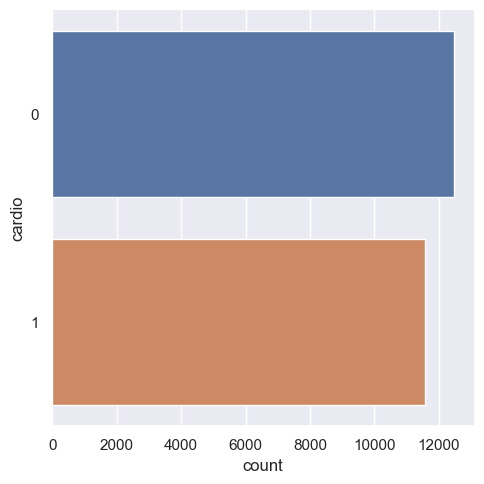

In [56]:
# Draw the distribution of Response
sb.catplot(y = "cardio", data = cardio_fwo_train, kind = "count")

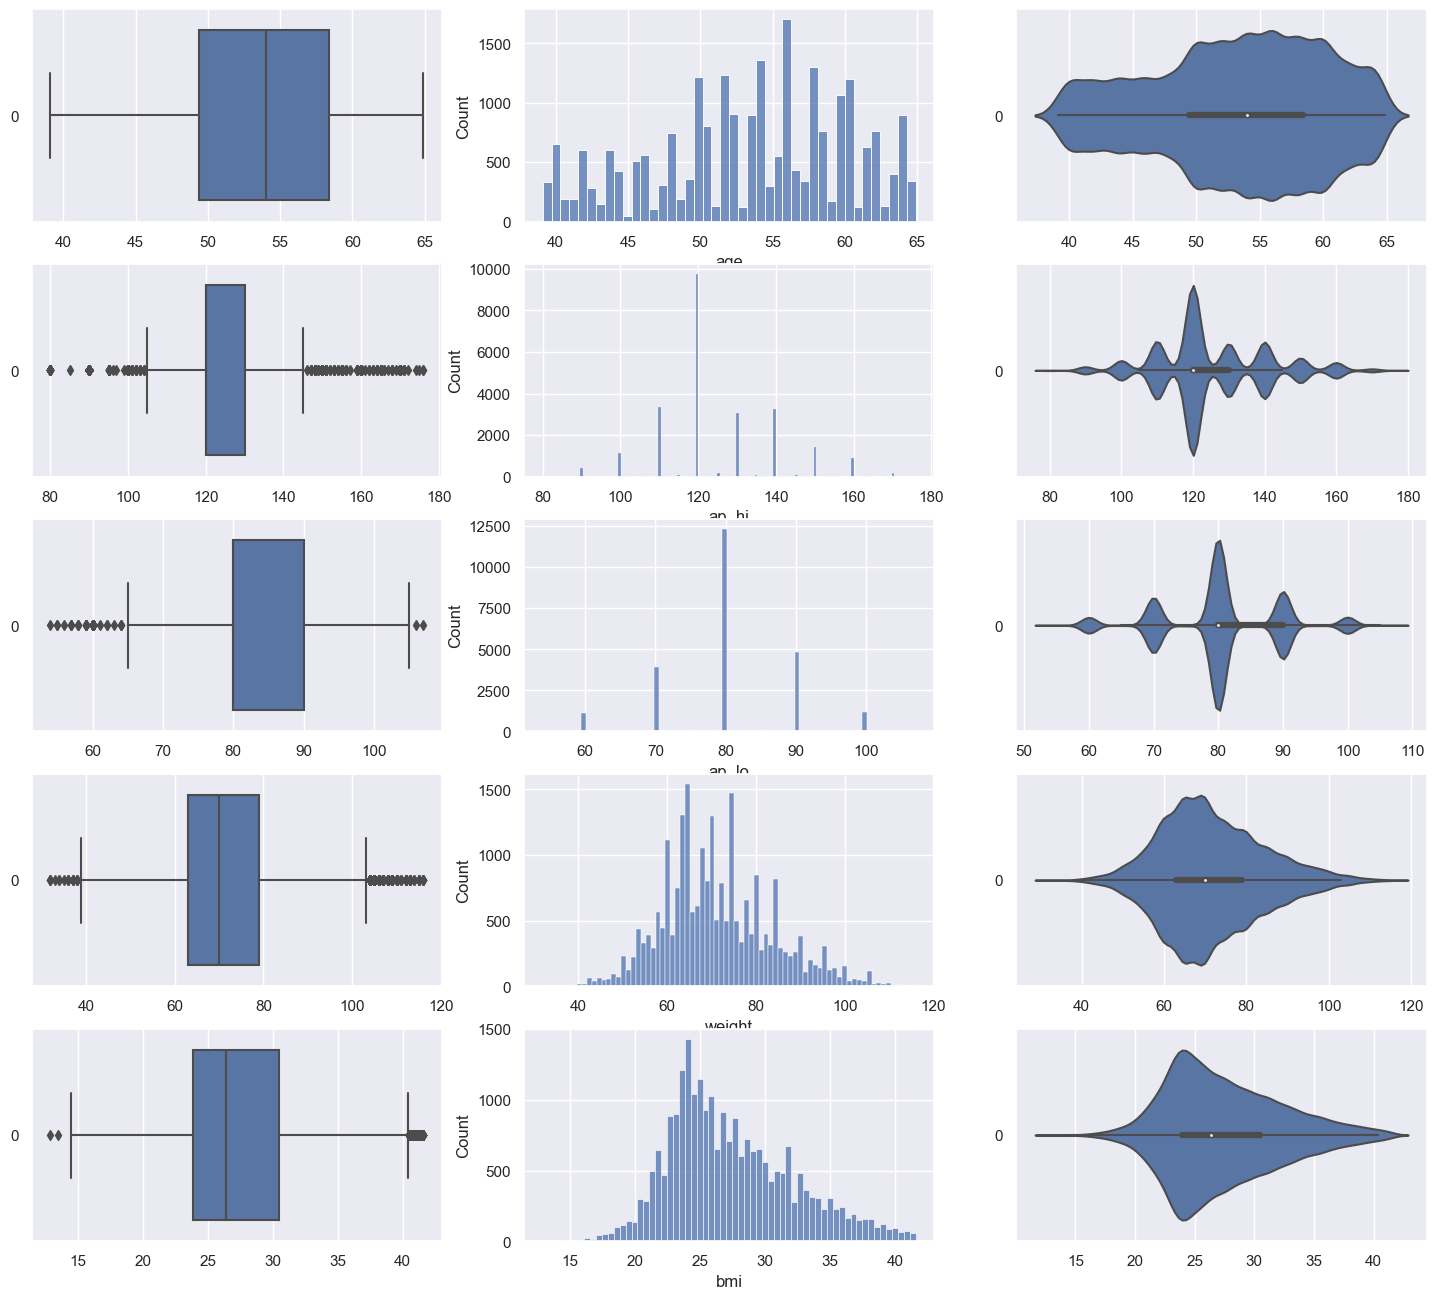

In [57]:
# Draw the distributions of all numerical Predictors
X_fwo_train_numerical = pd.DataFrame(X_fwo_train[["age", "ap_hi", "ap_lo", "weight", "bmi"]])
f, axes = plt.subplots(5, 3, figsize=(18, 16))

count = 0
for var in X_fwo_train_numerical:
    sb.boxplot(data = X_fwo_train_numerical[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = X_fwo_train_numerical[var], ax = axes[count,1])
    sb.violinplot(data = X_fwo_train_numerical[var], orient = "h", ax = axes[count,2])
    count += 1

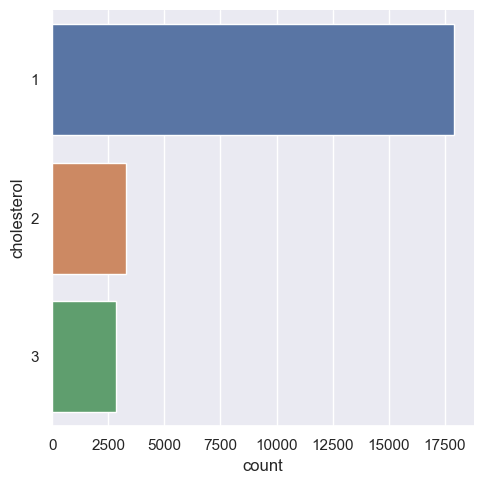

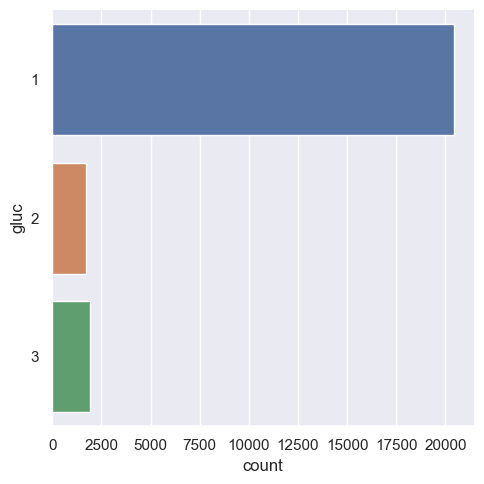

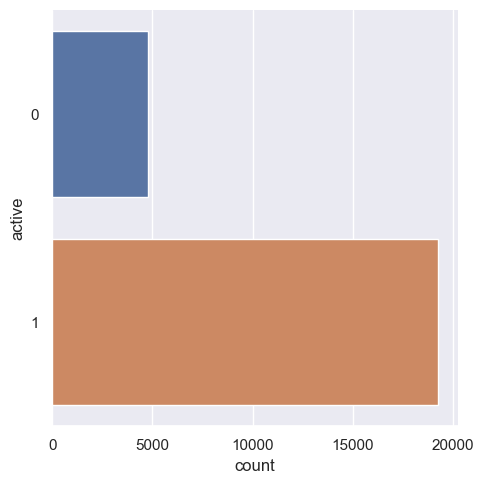

In [58]:
# Draw the cat plots of all categorical Predictors
sb.catplot(y = "cholesterol", data = X_fwo_train, kind = "count")
sb.catplot(y = "gluc", data = X_fwo_train, kind = "count")
sb.catplot(y = "active", data = X_fwo_train, kind = "count")

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7245093147039254

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7350629911438193

TPR (Train Dataset):  0.6484455958549222

TPR (Test Dataset):  0.6556870818322182


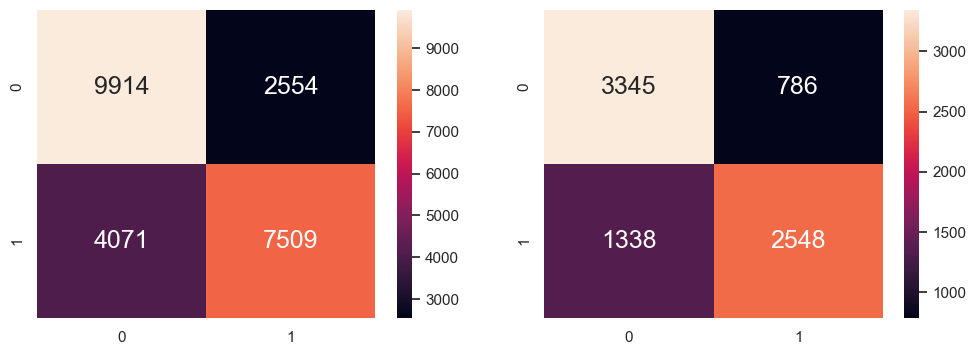

In [59]:
# Decision Tree using Train Data
dectree1 = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree1.fit(X_fwo_train, cardio_fwo_train)       # train the decision tree model

# Predict Response corresponding to Predictors
cardio_fwo_train_pred = dectree1.predict(X_fwo_train)
cardio_fwo_test_pred = dectree1.predict(X_fwo_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree1.score(X_fwo_train, cardio_fwo_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree1.score(X_fwo_test, cardio_fwo_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(cardio_fwo_train, cardio_fwo_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(cardio_fwo_test, cardio_fwo_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Check the TPR on Train Set
print("TPR (Train Dataset): ", recall_score(cardio_fwo_train, cardio_fwo_train_pred))
print()

# Check the TPR on Test Set
print("TPR (Test Dataset): ", recall_score(cardio_fwo_test, cardio_fwo_test_pred))

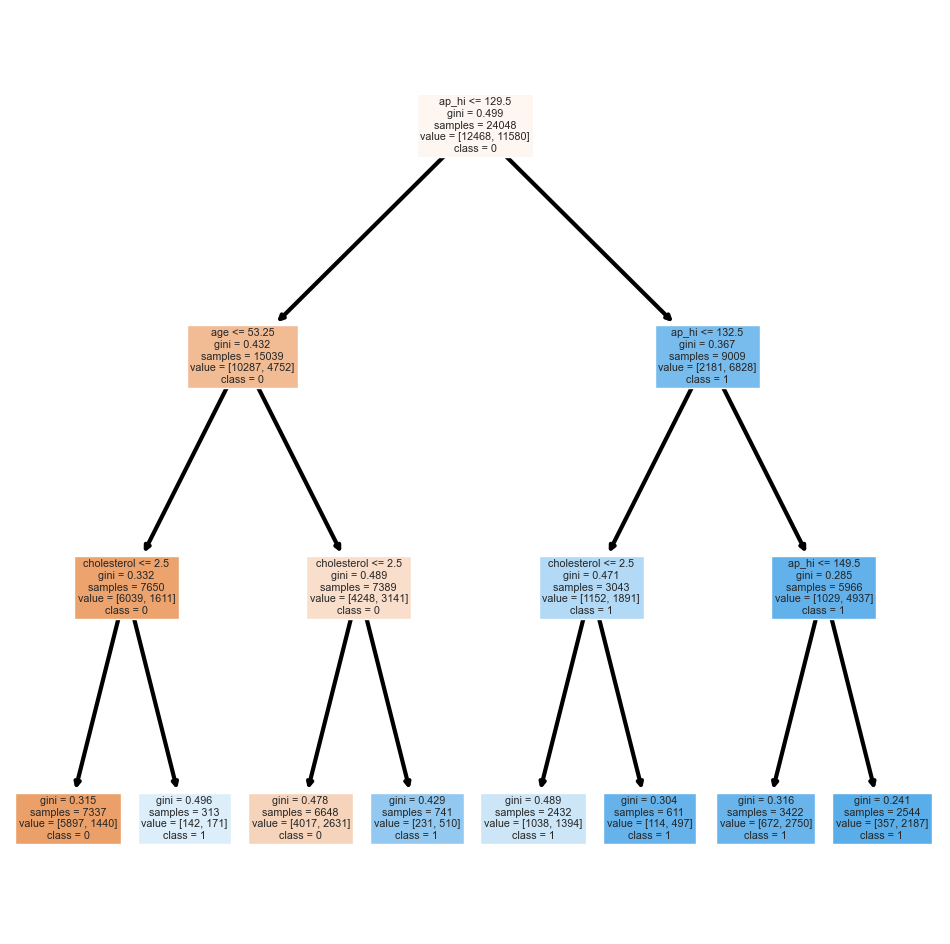

In [60]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree1, 
          feature_names = X_fwo_train.columns.tolist(),
          class_names = [str(x) for x in dectree1.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

From the decision tree, we observe that the most significant factors related to cardiovascular diseases in females are ap_hi, age, and cholesterol.

---
<a id='fo'></a>
# Female With Outliers  
## Simple Decision Tree

We will use ap_hi as it has the highest correlation with cardio.   

Response Variable : **cardio_fo**     
Predictor Feature : **ap_hi_fo** (systolic blood pressure)   

Extract the variables and the associated data as a Pandas `DataFrame`.

In [61]:
cardio_fo = pd.DataFrame(female_with_outliers['cardio'])  # Response
ap_hi_fo = pd.DataFrame(female_with_outliers['ap_hi'])    # Predictor

Set up the classification problem with Train and Test datasets.   
Test ratio = 0.25

In [62]:
# Split the Dataset into Train and Test
ap_hi_fo_train, ap_hi_fo_test, cardio_fo_train, cardio_fo_test = train_test_split(ap_hi_fo, cardio_fo, test_size = 0.25)

# Check the sample sizes
print("Train Set :", ap_hi_fo_train.shape, cardio_fo_train.shape)
print("Test Set  :", ap_hi_fo_test.shape, cardio_fo_test.shape)

Train Set : (25171, 1) (25171, 1)
Test Set  : (8391, 1) (8391, 1)


#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [63]:
# Summary Statistics for cardio_fo Train
cardio_fo_train["cardio"].value_counts()

0    12822
1    12349
Name: cardio, dtype: int64

In [64]:
# Summary Statistics for ap_hi_fo Train
ap_hi_fo_train.describe()

ap_hi
count  25171.000000
mean     125.933455
std       16.834023
min       70.000000
25%      120.000000
50%      120.000000
75%      140.000000
max      240.000000

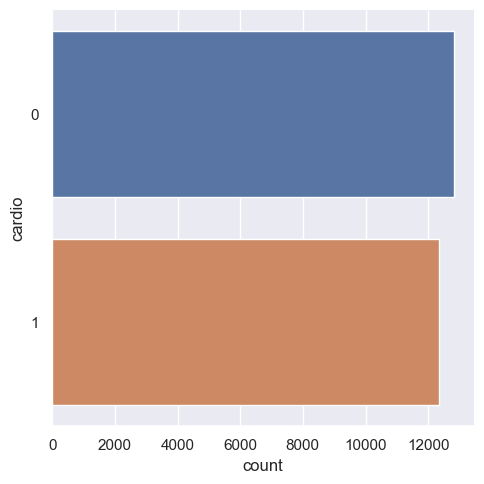

In [65]:
# Count Plot for cardio_fo Train
sb.catplot(y = "cardio", data = cardio_fo_train, kind = "count")

<Axes: >

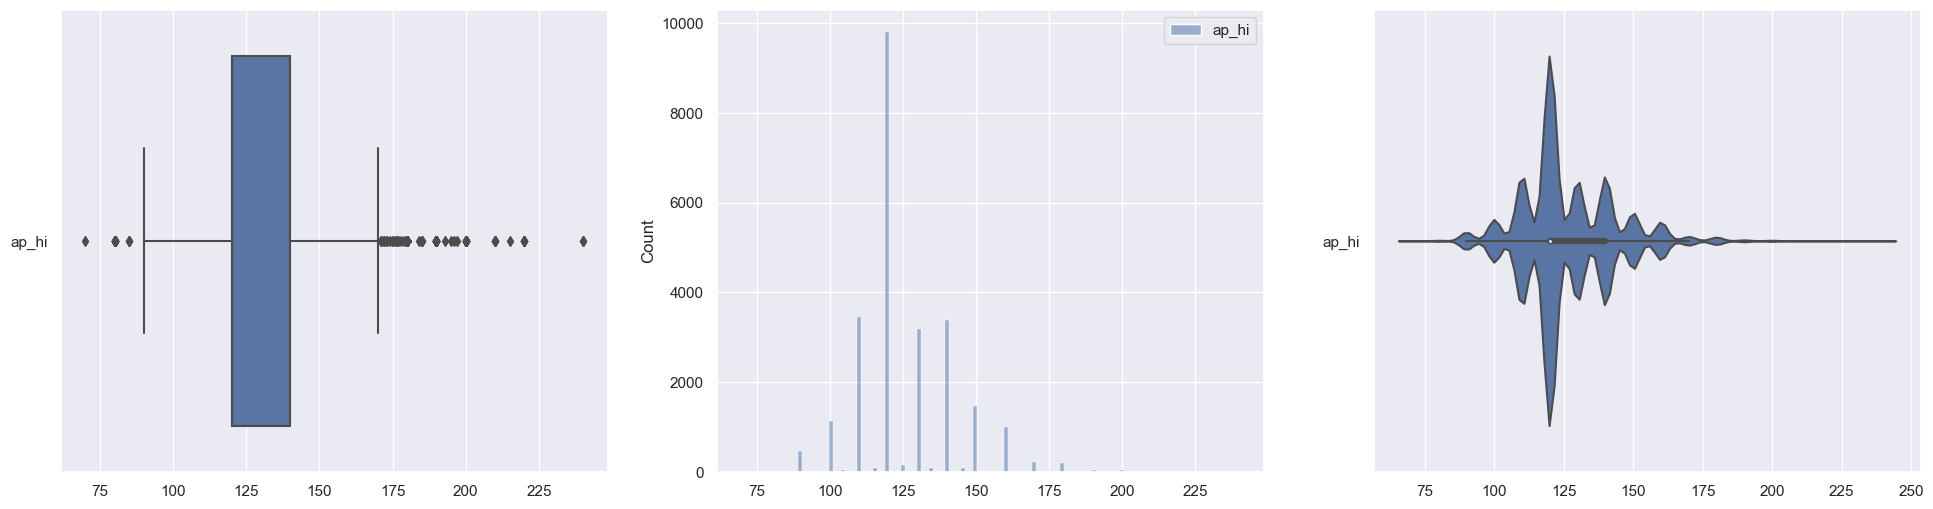

In [66]:
# Plot the distributions of ap_hi_fo Train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = ap_hi_fo_train, orient = "h", ax = axes[0])
sb.histplot(data = ap_hi_fo_train, ax = axes[1])
sb.violinplot(data = ap_hi_fo_train, orient = "h", ax = axes[2])

<Axes: xlabel='ap_hi', ylabel='cardio'>

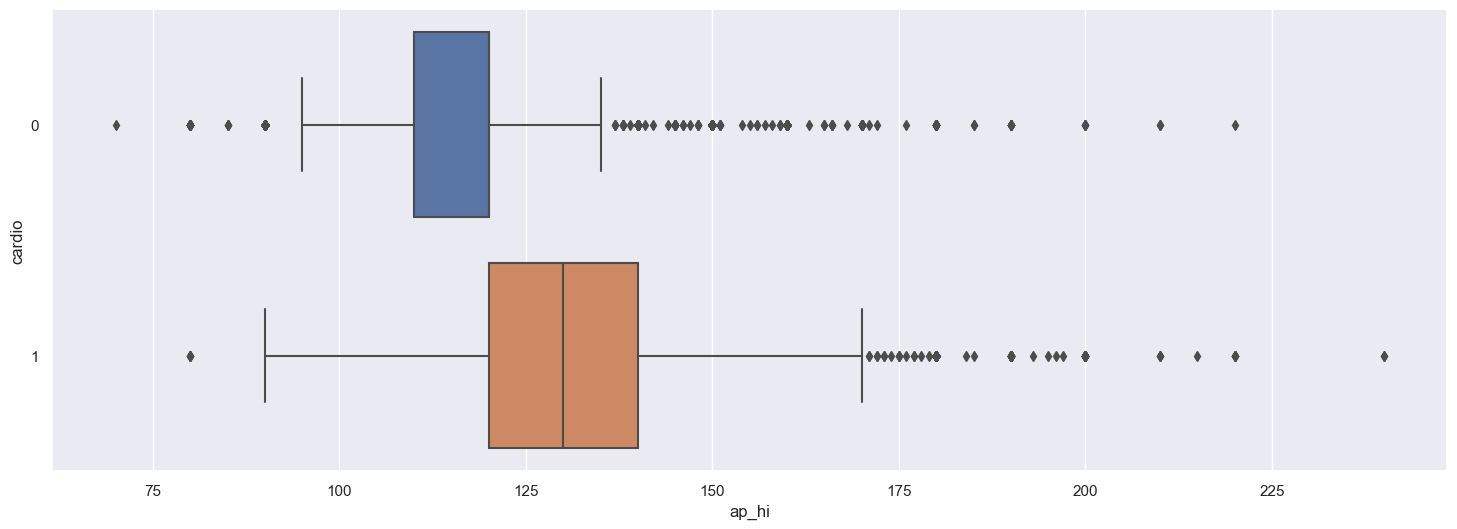

In [67]:
# Create a joint dataframe by concatenating ap_hi and cardio
trainDF_fo = pd.concat([ap_hi_fo_train, cardio_fo_train], axis = 1).reindex(ap_hi_fo_train.index)

# Joint Boxplot of cardio Train against ap_hi Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "ap_hi", y = "cardio", data = trainDF_fo, orient = "h")

#### Decision Tree in Scikit-Learn


In [68]:
# Recall the cardio-ap_hi Dataset
cardio_fo = pd.DataFrame(female_with_outliers['cardio'])   # Response
ap_hi_fo = pd.DataFrame(female_with_outliers['ap_hi'])     # Predictor

# Split the cardio-ap_hi Dataset into Train and Test
ap_hi_fo_train, ap_hi_fo_test, cardio_fo_train, cardio_fo_test = train_test_split(ap_hi_fo, cardio_fo, test_size = 0.25)

In [69]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

Train the Decision Tree Classifier model `dectree` using the Train Set.   
Use `ap_hi_fo_train` as *Predictor* and `cardio_fo_train` as *Response*.

In [70]:
# Train the Decision Tree Classifier model
dectree.fit(ap_hi_fo_train, cardio_fo_train)

DecisionTreeClassifier(max_depth=2)

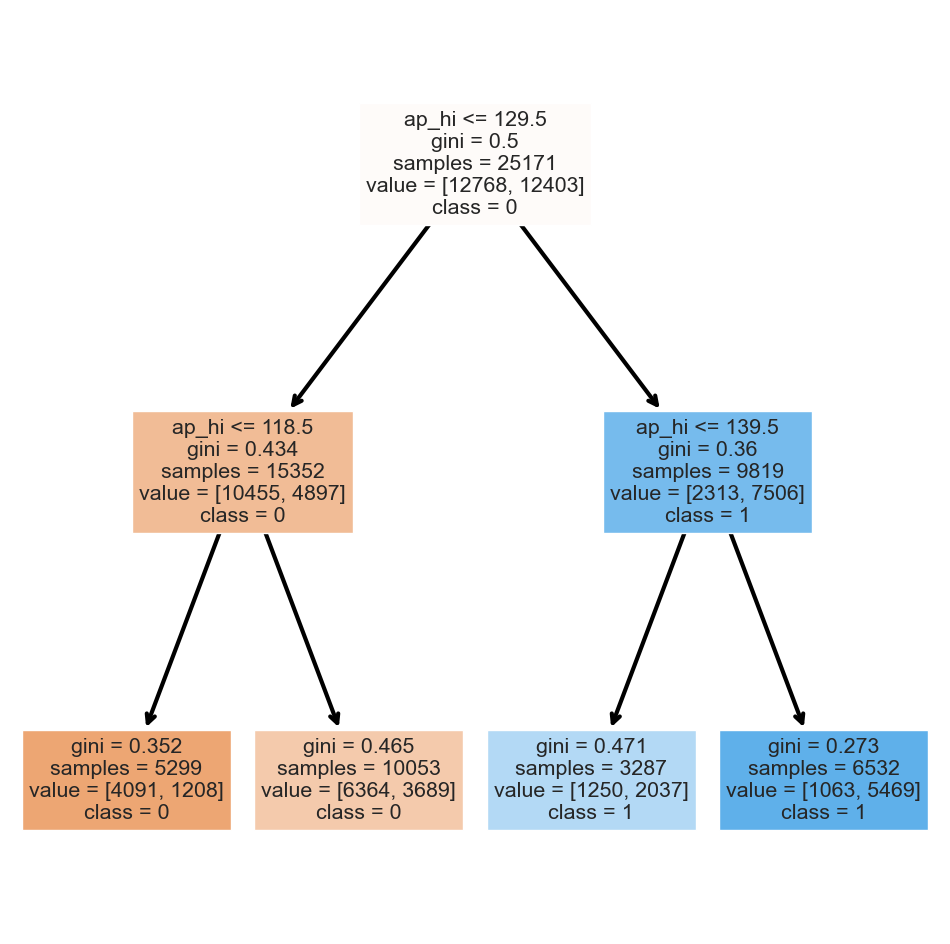

In [71]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = ap_hi_fo_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

#### Goodness of Fit of the Model

Check how good the predictions are on the Train Set.    
Metrics : Classification Accuracy, Confusion Matrix and True Positive Rate.

In [72]:
# Predict cardio corresponding to ap_hi Train
cardio_fo_train_pred = dectree.predict(ap_hi_fo_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(ap_hi_fo_train, cardio_fo_train))
print()

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(cardio_fo_train, cardio_fo_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#Print TPR
print("TPR (Train Set) \t:", recall_score(cardio_fo_train, cardio_fo_train_pred))

Classification Accuracy 	: 0.7135592546978666

TPR (Train Set) 	: 0.6051761670563574


In [73]:
# Predict cardio corresponding to ap_hi_fo Test
cardio_fo_test_pred = dectree.predict(ap_hi_fo_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(ap_hi_fo_test, cardio_fo_test))
print()

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(cardio_fo_test, cardio_fo_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#Print TPR
print("TPR (Train Set) \t:", recall_score(cardio_fo_test, cardio_fo_test_pred))

Classification Accuracy 	: 0.7101656536765583

TPR (Train Set) 	: 0.6097442143727162


## Chi-Square Test of Independence

In [74]:
#Chi square test for cholesterol and cardio
crosstab_fo = pd.crosstab(female_with_outliers["cholesterol"], female_with_outliers["cardio"])
crosstab_fo, test_results_fo, expected_fo = rp.crosstab(female_with_outliers["cholesterol"], female_with_outliers["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_fo

Chi-square test    results
0  Pearson Chi-square ( 2.0) =   1780.3396
1                    p-value =      0.0000
2                 Cramer's V =      0.2303

In [75]:
#Chi square test for glucose and cardio
crosstab_fo = pd.crosstab(female_with_outliers["gluc"], female_with_outliers["cardio"])
crosstab_fo, test_results_fo, expected_fo = rp.crosstab(female_with_outliers["gluc"], female_without_outliers["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_fo

Chi-square test  results
0  Pearson Chi-square ( 2.0) =    4.4107
1                    p-value =    0.1102
2                 Cramer's V =    0.0117

In [76]:
#Chi square test for smoke and cardio
crosstab_fo = pd.crosstab(female_with_outliers["smoke"], female_with_outliers["cardio"])
crosstab_fo, test_results_fo, expected_fo = rp.crosstab(female_with_outliers["smoke"], female_without_outliers["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_fo

Chi-square test  results
0  Pearson Chi-square ( 1.0) =    2.7420
1                    p-value =    0.0977
2               Cramer's phi =    0.0092

In [77]:
#Chi square test for alcohol and cardio
crosstab_fo = pd.crosstab(female_with_outliers["alco"], female_with_outliers["cardio"])
crosstab_fo, test_results_fo, expected_fo = rp.crosstab(female_with_outliers["alco"], female_without_outliers["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_fo

Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.0752
1                    p-value =    0.7840
2               Cramer's phi =    0.0015

In [78]:
#Chi square test for active and cardio
crosstab_fo = pd.crosstab(female_with_outliers["active"], female_with_outliers["cardio"])
crosstab_fo, test_results_fo, expected_fo = rp.crosstab(female_with_outliers["active"], female_without_outliers["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_fo

Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.6494
1                    p-value =    0.4203
2               Cramer's phi =    0.0045

It can be seen that at 5% significance level, only cholesterol and glucose are significant in predicting risk of cardiovascular disease as their respective p-values are below 0.05. Cholesterol had a very strong relationship with cardiovascular disease, glucose had a weak relationship.

---
## Multi-Variate Classification Tree

We will now set up a Multi-Variate Classification problem.
We will use the factors that are significant according to the Chi-Square test alongside the numerical variables.

Response Variable : **Cardio**     
Predictor Feature : **Age, Ap_hi, Ap_lo, Weight, BMI, Cholesterol, Glucose**        

Extract the variables and the associated data as a Pandas `DataFrame`.

In [79]:
#Extract Response and Predictors
cardio_fo = pd.DataFrame(female_with_outliers["cardio"])
X_fo = pd.DataFrame(female_with_outliers[["age", "ap_hi", "ap_lo", "weight", "bmi", "cholesterol", "gluc"]])

In [80]:
# Split the Dataset into Train and Test
X_fo_train, X_fo_test, cardio_fo_train, cardio_fo_test = train_test_split(X_fo, cardio_fo, test_size = 0.25)

# Check the sample sizes
print("Train Set :", cardio_fo_train.shape, X_fo_train.shape)
print("Test Set  :", cardio_fo_test.shape, X_fo_test.shape)

Train Set : (25171, 1) (25171, 7)
Test Set  : (8391, 1) (8391, 7)


#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [81]:
# Summary Statistics for Response
cardio_fo_train["cardio"].value_counts()

0    12804
1    12367
Name: cardio, dtype: int64

In [82]:
# Summary Statistics for Predictors
X_fo_train.describe()

age         ap_hi         ap_lo        weight           bmi  \
count  25171.000000  25171.000000  25171.000000  25171.000000  25171.000000   
mean      53.459350    125.989114     80.855866     72.441444     27.917683   
std        6.646011     16.730291      9.608654     14.114735      6.292508   
min       30.000000     70.000000      7.000000     29.000000      9.900000   
25%       49.500000    120.000000     80.000000     63.000000     23.900000   
50%       54.100000    120.000000     80.000000     70.000000     26.700000   
75%       58.400000    140.000000     90.000000     80.000000     30.900000   
max       64.900000    240.000000    182.000000    200.000000    298.700000   

        cholesterol          gluc  
count  25171.000000  25171.000000  
mean       1.386755      1.232410  
std        0.695691      0.579699  
min        1.000000      1.000000  
25%        1.000000      1.000000  
50%        1.000000      1.000000  
75%        2.000000      1.000000  
max        3.000000      3.000000

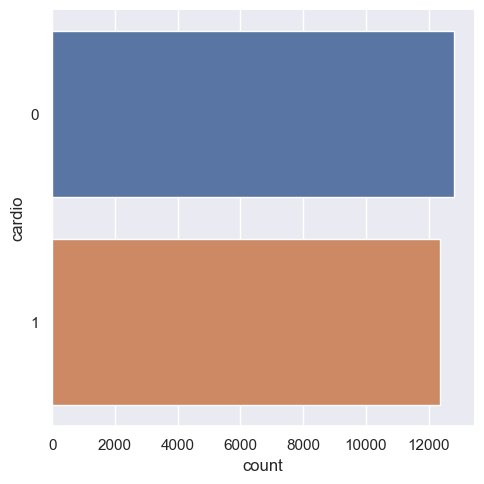

In [83]:
# Draw the distribution of Response
sb.catplot(y = "cardio", data = cardio_fo_train, kind = "count")

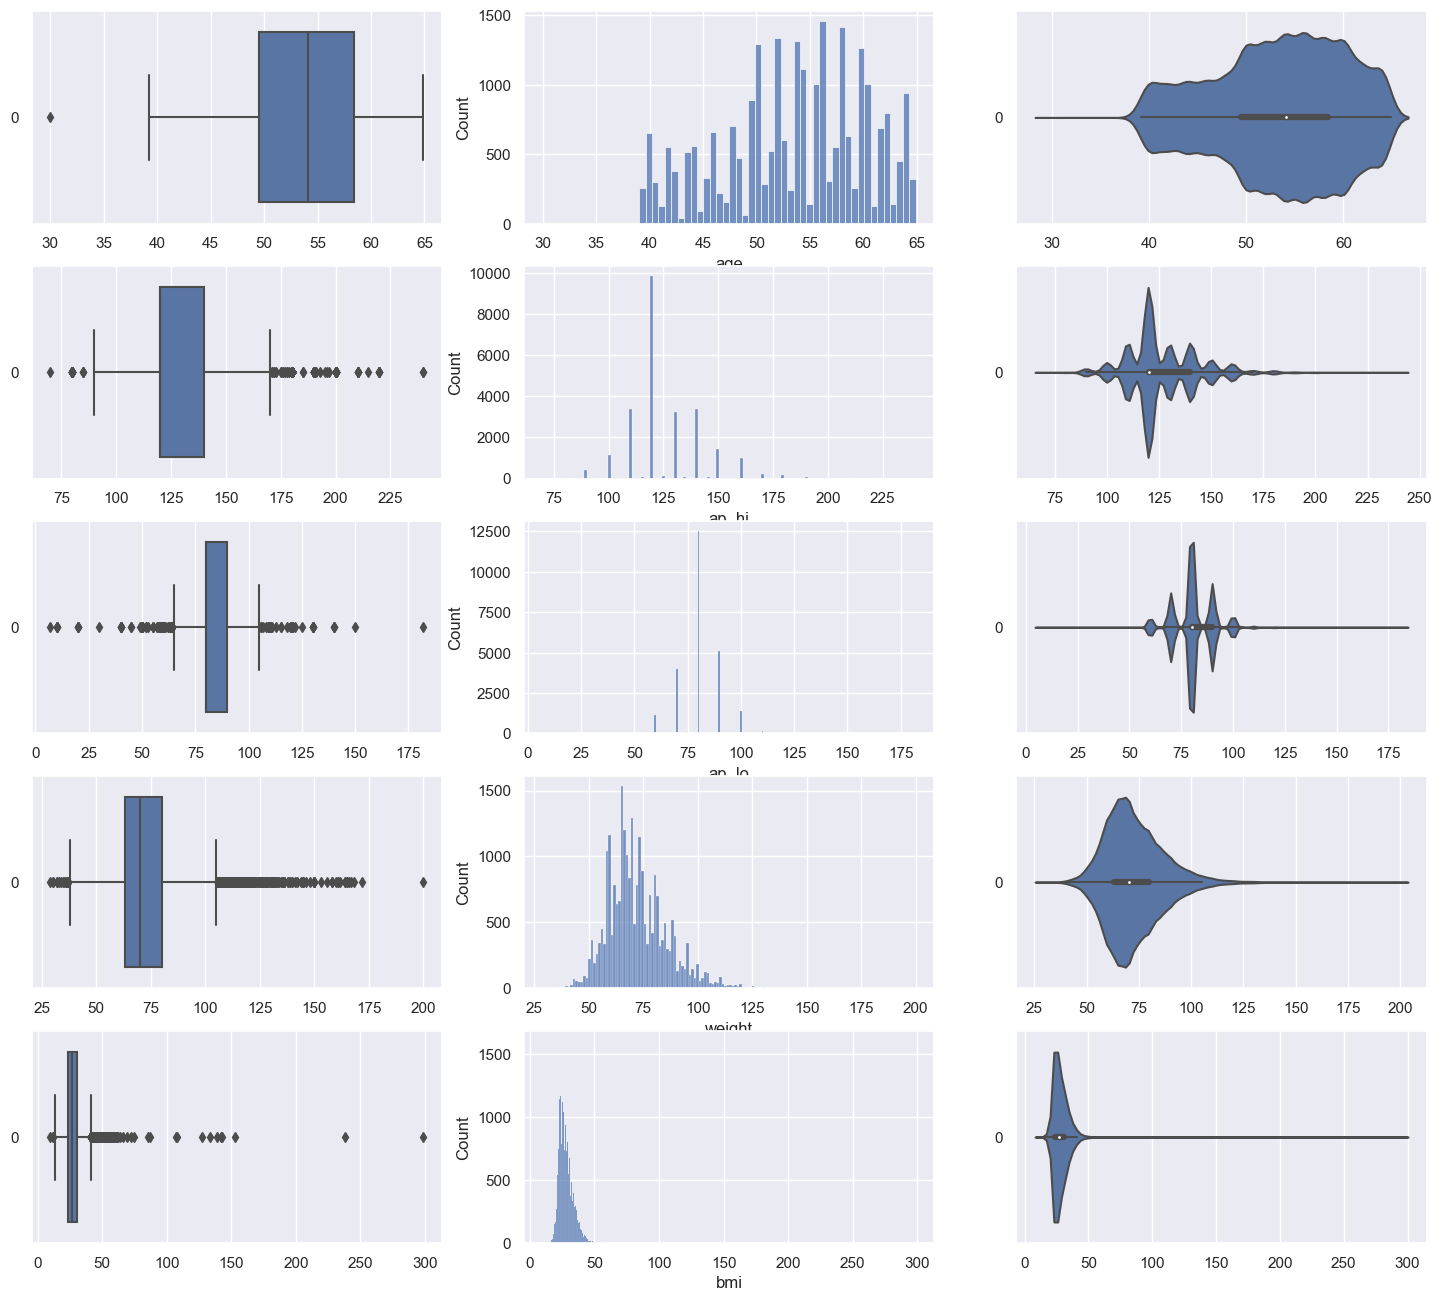

In [84]:
# Draw the distributions of all numerical Predictors
X_fo_train_numerical = pd.DataFrame(X_fo_train[["age", "ap_hi", "ap_lo", "weight", "bmi"]])
f, axes = plt.subplots(5, 3, figsize=(18, 16))

count = 0
for var in X_fo_train_numerical:
    sb.boxplot(data = X_fo_train_numerical[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = X_fo_train_numerical[var], ax = axes[count,1])
    sb.violinplot(data = X_fo_train_numerical[var], orient = "h", ax = axes[count,2])
    count += 1

In [85]:
# Draw the cat plots of all categorical Predictors
sb.catplot(y = "cholesterol", data = X_fo_train, kind = "count")
sb.catplot(y = "gluc", data = X_fo_train, kind = "count")

In [86]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)
dectree.fit(X_fo_train, cardio_fo_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
cardio_fo_train_pred = dectree.predict(X_fo_train)
cardio_fo_test_pred = dectree.predict(X_fo_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_fo_train, cardio_fo_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_fo_test, cardio_fo_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(cardio_fo_train, cardio_fo_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(cardio_fo_test, cardio_fo_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Check the TPR on Train Set
print("TPR (Train Dataset): ", recall_score(cardio_fo_train, cardio_fo_train_pred))
print()

# Check the TPR on Test Set
print("TPR (Test Dataset): ", recall_score(cardio_fo_test, cardio_fo_test_pred))

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.727384688729093

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.722440710284829

TPR (Train Dataset):  0.6665318994097195

TPR (Test Dataset):  0.6508089833373581


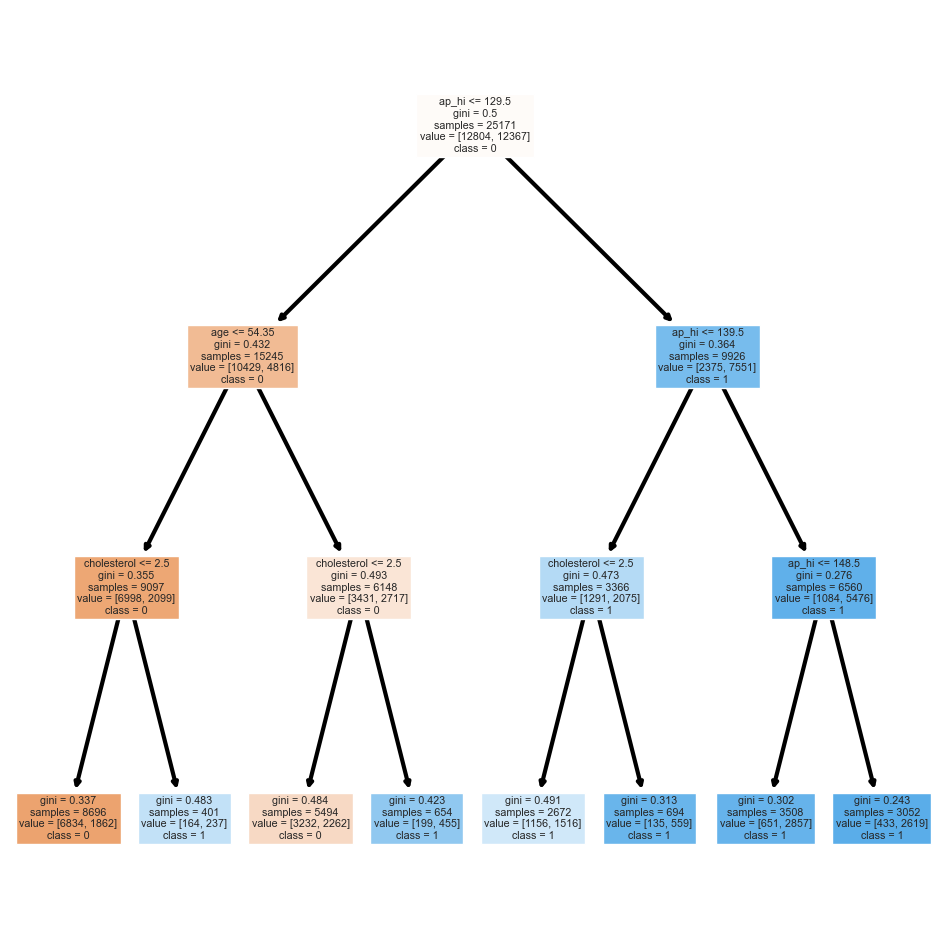

In [87]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_fo_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

The significant factors related to CVD in females remain the same with or without outliers: ap_hi, age, cholesterol.

---
<a id='mwo'></a>
# Male Without Outliers  
## Simple Decision Tree

We will use ap_hi as it has the highest correlation with cardio.

Response Variable : **cardio_mwo**     
Predictor Feature : **ap_hi_mwo** (systolic blood pressure)   

Extract the variables and the associated data as a Pandas `DataFrame`.

In [88]:
cardio_mwo = pd.DataFrame(male_without_outliers['cardio'])  # Response
ap_hi_mwo = pd.DataFrame(male_without_outliers['ap_hi'])    # Predictor

Set up the classification problem with Train and Test datasets.   
Test ratio = 0.25

In [89]:
# Split the Dataset into Train and Test
ap_hi_mwo_train, ap_hi_mwo_test, cardio_mwo_train, cardio_mwo_test = train_test_split(ap_hi_mwo, cardio_mwo, test_size = 0.25)

# Check the sample sizes
print("Train Set :", ap_hi_mwo_train.shape, cardio_mwo_train.shape)
print("Test Set  :", ap_hi_mwo_test.shape, cardio_mwo_test.shape)

Train Set : (12967, 1) (12967, 1)
Test Set  : (4323, 1) (4323, 1)


#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [90]:
# Summary Statistics for cardio_mwo Train
cardio_mwo_train["cardio"].value_counts()

0    6634
1    6333
Name: cardio, dtype: int64

In [91]:
# Summary Statistics for ap_hi_mwo Train
ap_hi_mwo_train.describe()

ap_hi
count  12967.000000
mean     126.835583
std       14.687493
min       80.000000
25%      120.000000
50%      120.000000
75%      140.000000
max      176.000000

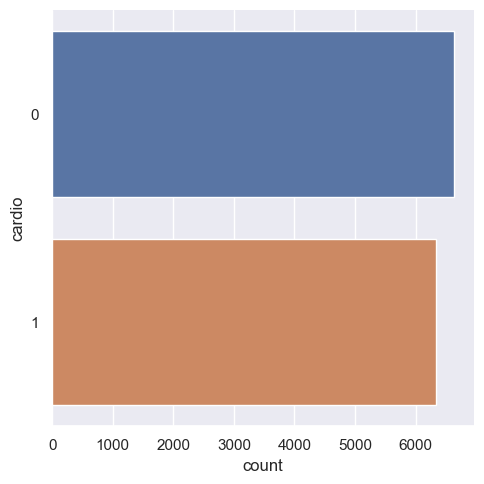

In [92]:
# Count Plot for cardio_mwo Train
sb.catplot(y = "cardio", data = cardio_mwo_train, kind = "count")

<Axes: >

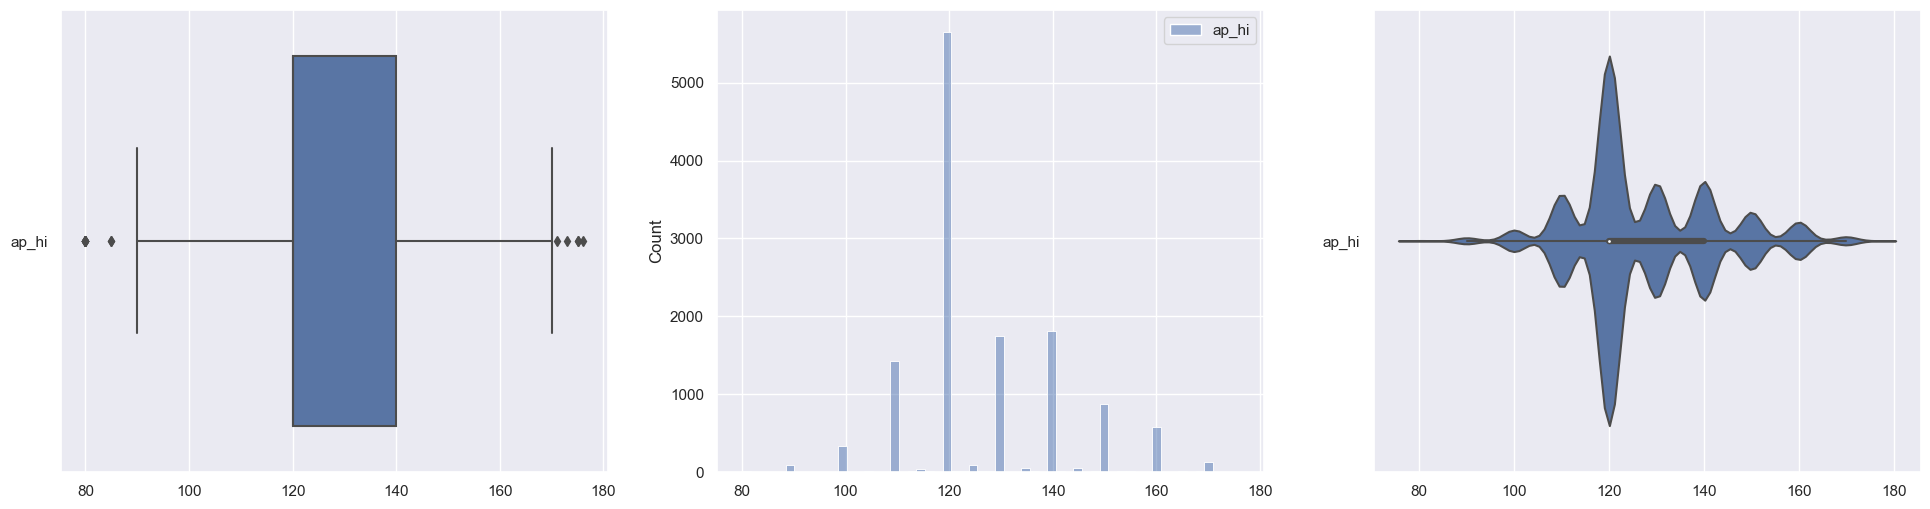

In [93]:
# Plot the distributions of ap_hi_mwo Train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = ap_hi_mwo_train, orient = "h", ax = axes[0])
sb.histplot(data = ap_hi_mwo_train, ax = axes[1])
sb.violinplot(data = ap_hi_mwo_train, orient = "h", ax = axes[2])

<Axes: xlabel='ap_hi', ylabel='cardio'>

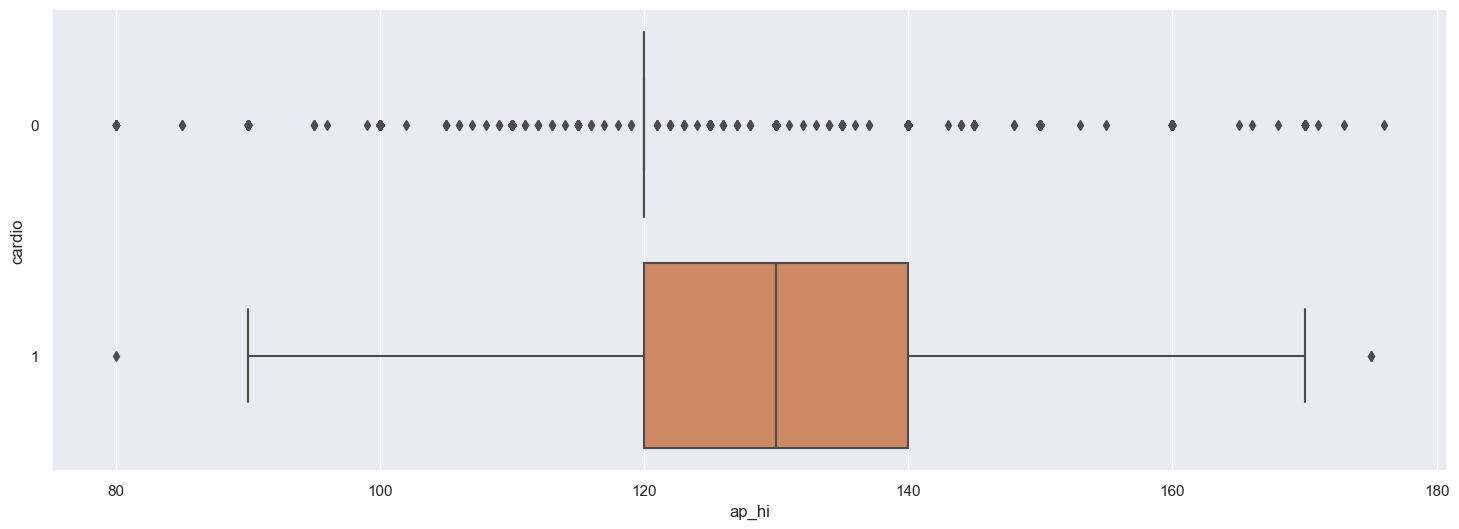

In [94]:
# Create a joint dataframe by concatenating ap_hi and cardio
trainDF_mwo = pd.concat([ap_hi_mwo_train, cardio_mwo_train], axis = 1).reindex(ap_hi_mwo_train.index)

# Joint Boxplot of cardio Train against ap_hi Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "ap_hi", y = "cardio", data = trainDF_mwo, orient = "h")

#### Decision Tree in Scikit-Learn


In [95]:
# Recall the cardio-ap_hi Dataset
cardio_mwo = pd.DataFrame(male_without_outliers['cardio'])   # Response
ap_hi_mwo = pd.DataFrame(male_without_outliers['ap_hi'])     # Predictor

# Split the cardio-ap_hi Dataset into Train and Test
ap_hi_mwo_train, ap_hi_mwo_test, cardio_mwo_train, cardio_mwo_test = train_test_split(ap_hi_mwo, cardio_mwo, test_size = 0.25)

In [96]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

Train the Decision Tree Classifier model `dectree` using the Train Set.   
Use `ap_hi_mwo_train` as *Predictor* and `cardio_mwo_train` as *Response*.

In [97]:
# Train the Decision Tree Classifier model
dectree.fit(ap_hi_mwo_train, cardio_mwo_train)

DecisionTreeClassifier(max_depth=2)

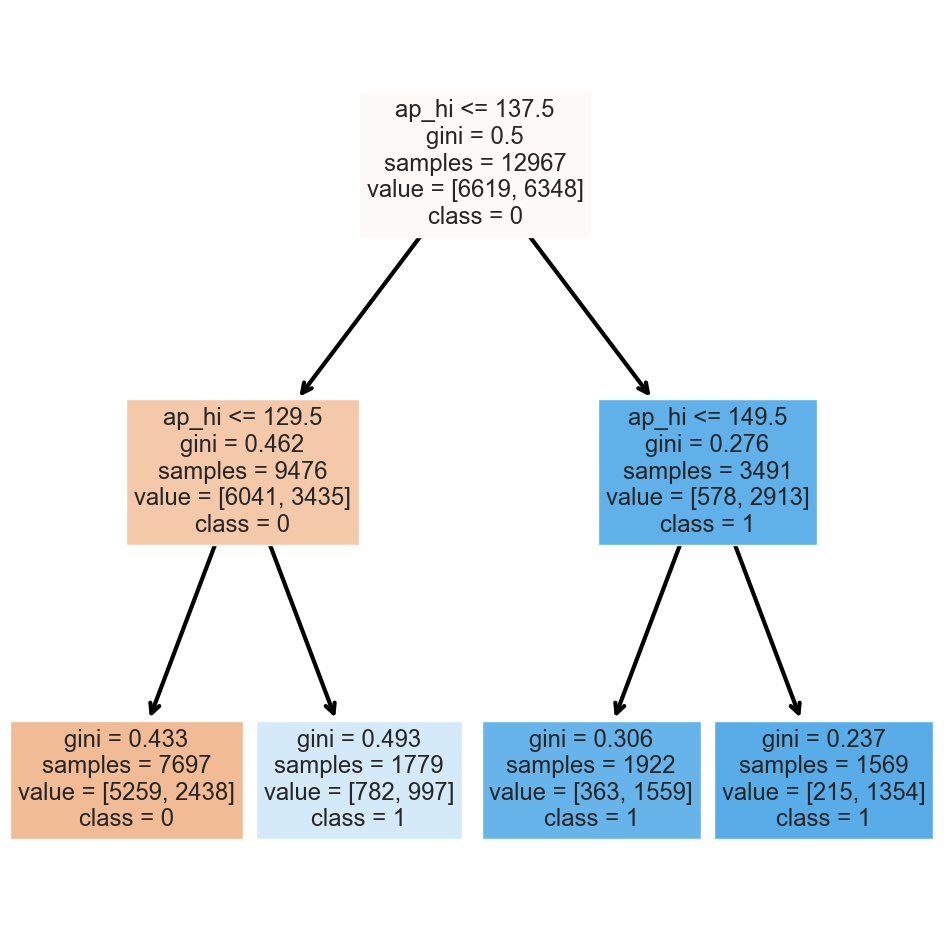

In [98]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = ap_hi_mwo_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

#### Goodness of Fit of the Model

Check how good the predictions are on the Train Set.    
Metrics : Classification Accuracy, Confusion Matrix and True Positive Rate.

Classification Accuracy 	: 0.7071026451762166
TPR (Train Set) 	: 0.6159420289855072


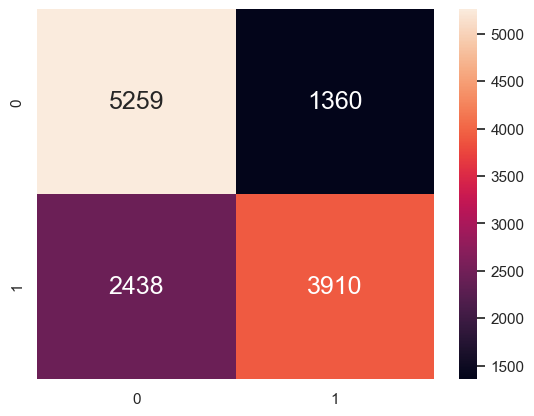

In [99]:
# Predict
cardio_mwo_train_pred = dectree.predict(ap_hi_mwo_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(ap_hi_mwo_train, cardio_mwo_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(cardio_mwo_train, cardio_mwo_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#Print TPR
print("TPR (Train Set) \t:", recall_score(cardio_mwo_train, cardio_mwo_train_pred))

Classification Accuracy 	: 0.7009021512838307
TPR (Test Set) 	: 0.6161954959271682


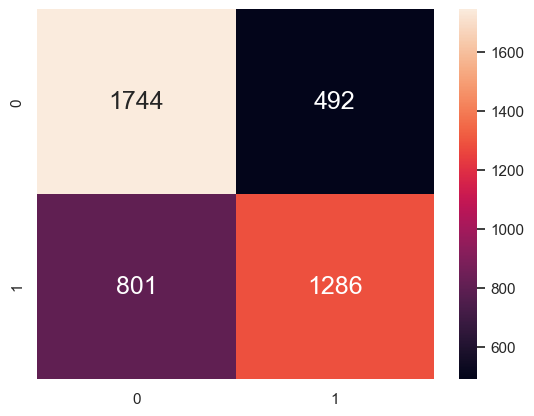

In [100]:
# Predict cardio corresponding to ap_hi_mwo Test
cardio_mwo_test_pred = dectree.predict(ap_hi_mwo_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(ap_hi_mwo_test, cardio_mwo_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(cardio_mwo_test, cardio_mwo_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#Print TPR
print("TPR (Test Set) \t:", recall_score(cardio_mwo_test, cardio_mwo_test_pred))

## Chi-Square Test of Independence

In [101]:
#Chi square test for cholesterol and cardio
crosstab_mwo = pd.crosstab(male_without_outliers["cholesterol"], male_without_outliers["cardio"])
crosstab_mwo, test_results_mwo, expected_mwo = rp.crosstab(male_without_outliers["cholesterol"], male_without_outliers["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_mwo

Chi-square test   results
0  Pearson Chi-square ( 2.0) =   722.0037
1                    p-value =     0.0000
2                 Cramer's V =     0.2043

In [102]:
#Chi square test for glucose and cardio
crosstab_mwo = pd.crosstab(male_without_outliers["gluc"], male_without_outliers["cardio"])
crosstab_mwo, test_results_mwo, expected_mwo = rp.crosstab(male_without_outliers["gluc"], male_with_outliers["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_mwo

Chi-square test  results
0  Pearson Chi-square ( 2.0) =    2.1895
1                    p-value =    0.3346
2                 Cramer's V =    0.0113

In [103]:
#Chi square test for smoke and cardio
crosstab_mwo = pd.crosstab(male_without_outliers["smoke"], male_without_outliers["cardio"])
crosstab_mwo, test_results_mwo, expected_mwo = rp.crosstab(male_without_outliers["smoke"], male_without_outliers["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_mwo

Chi-square test  results
0  Pearson Chi-square ( 1.0) =   26.6656
1                    p-value =    0.0000
2               Cramer's phi =    0.0393

In [104]:
#Chi square test for alcohol and cardio
crosstab_mwo = pd.crosstab(male_without_outliers["alco"], male_without_outliers["cardio"])
crosstab_mwo, test_results_mwo, expected_mwo = rp.crosstab(male_without_outliers["alco"], male_without_outliers["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_mwo

Chi-square test  results
0  Pearson Chi-square ( 1.0) =    9.1301
1                    p-value =    0.0025
2               Cramer's phi =    0.0230

In [105]:
#Chi square test for active and cardio
crosstab_mwo = pd.crosstab(male_without_outliers["active"], male_without_outliers["cardio"])
crosstab_mwo, test_results_mwo, expected_mwo = rp.crosstab(male_without_outliers["active"], male_without_outliers["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_mwo

Chi-square test  results
0  Pearson Chi-square ( 1.0) =   48.0727
1                    p-value =    0.0000
2               Cramer's phi =    0.0527

It can be seen that at 5% significance level, cholesterol, smoke, alcohol and active are all significant in predicting risk of cardiovascular disease as their respective p-values are below 0.05. Cholesterol had a very strong relationship with cardiovascular disease, smoke, alcohol and active had weak relationships.

---
## Multi-Variate Classification Tree

We will now set up a Multi-Variate Classification problem.
We will use the factors that are significant according to the Chi-Square test alongside the numerical variables.

Response Variable : **Cardio**     
Predictor Feature : **Age, Ap_hi, Ap_lo, Weight, BMI, Cholesterol, Smoke, Alcohol, Active**        

Extract the variables and the associated data as a Pandas `DataFrame`.

In [116]:
#Extract Response and Predictors
cardio_mwo = pd.DataFrame(male_without_outliers["cardio"])
X_mwo = pd.DataFrame(male_without_outliers[["age", "ap_hi", "ap_lo", "weight", "bmi", "cholesterol", "smoke", "alco", "active"]])

In [117]:
# Split the Dataset into Train and Test
X_mwo_train, X_mwo_test, cardio_mwo_train, cardio_mwo_test = train_test_split(X_mwo, cardio_mwo, test_size = 0.25)

# Check the sample sizes
print("Train Set :", cardio_mwo_train.shape, X_mwo_train.shape)
print("Test Set  :", cardio_mwo_test.shape, X_mwo_test.shape)

Train Set : (12967, 1) (12967, 9)
Test Set  : (4323, 1) (4323, 9)


#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [118]:
# Summary Statistics for Response
cardio_mwo_train["cardio"].value_counts()

0    6682
1    6285
Name: cardio, dtype: int64

In [119]:
# Summary Statistics for Predictors
X_mwo_train.describe()

age         ap_hi         ap_lo        weight           bmi  \
count  12967.000000  12967.000000  12967.000000  12967.000000  12967.000000   
mean      53.083913    126.728156     81.440271     76.203748     26.366075   
std        6.938766     14.673896      8.439509     12.738723      3.937258   
min       39.100000     80.000000     55.000000     40.000000     13.500000   
25%       47.900000    120.000000     80.000000     68.000000     23.700000   
50%       53.800000    120.000000     80.000000     75.000000     25.700000   
75%       58.400000    140.000000     90.000000     84.000000     28.700000   
max       65.000000    176.000000    106.000000    116.000000     41.200000   

        cholesterol        smoke          alco        active  
count  12967.000000  12967.00000  12967.000000  12967.000000  
mean       1.320737      0.21948      0.103802      0.806894  
std        0.646127      0.41391      0.305015      0.394750  
min        1.000000      0.00000      0.000000      0.000000  
25%        1.000000      0.00000      0.000000      1.000000  
50%        1.000000      0.00000      0.000000      1.000000  
75%        1.000000      0.00000      0.000000      1.000000  
max        3.000000      1.00000      1.000000      1.000000

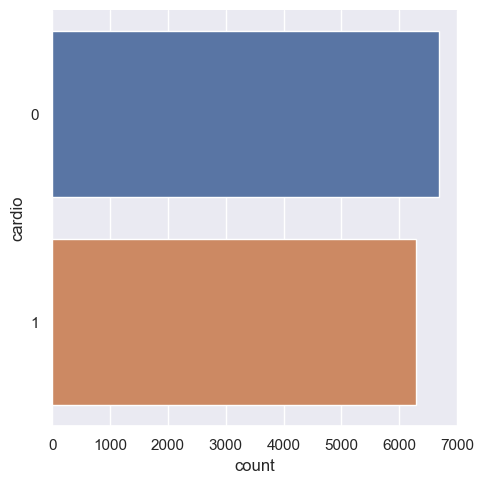

In [120]:
# Draw the distribution of Response
sb.catplot(y = "cardio", data = cardio_mwo_train, kind = "count")

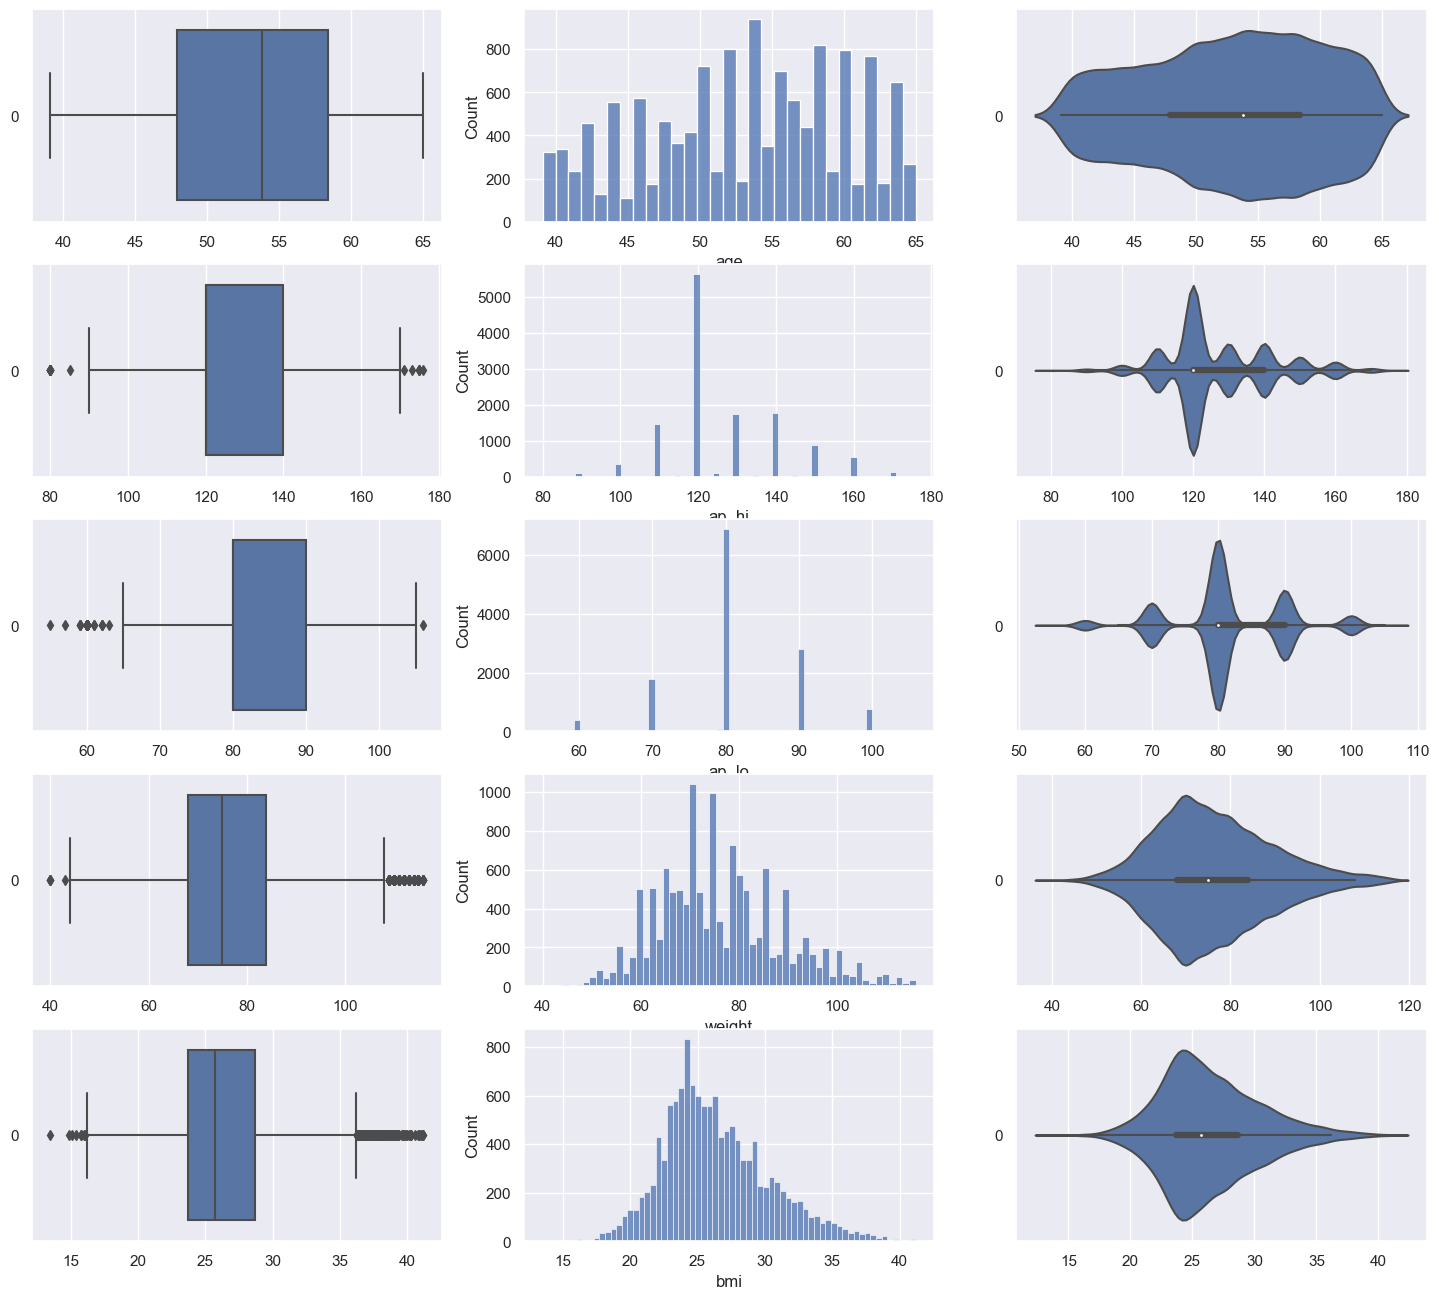

In [121]:
# Draw the distributions of all numerical Predictors
X_mwo_train_numerical = pd.DataFrame(X_mwo_train[["age", "ap_hi", "ap_lo", "weight", "bmi"]])
f, axes = plt.subplots(5, 3, figsize=(18, 16))

count = 0
for var in X_mwo_train_numerical:
    sb.boxplot(data = X_mwo_train_numerical[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = X_mwo_train_numerical[var], ax = axes[count,1])
    sb.violinplot(data = X_mwo_train_numerical[var], orient = "h", ax = axes[count,2])
    count += 1

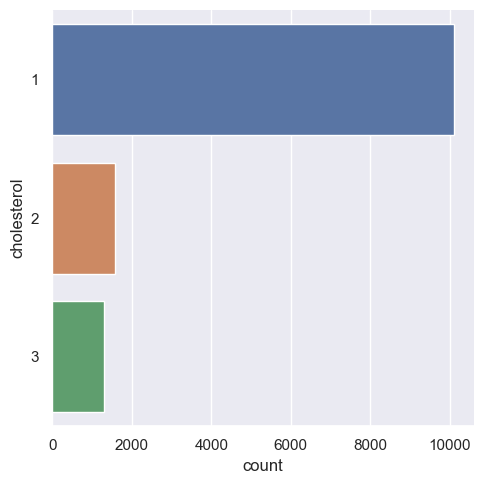

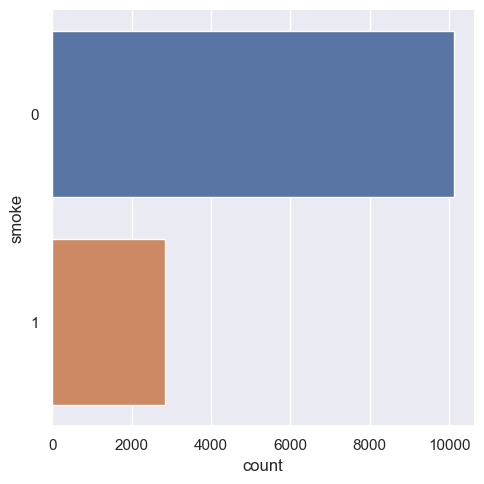

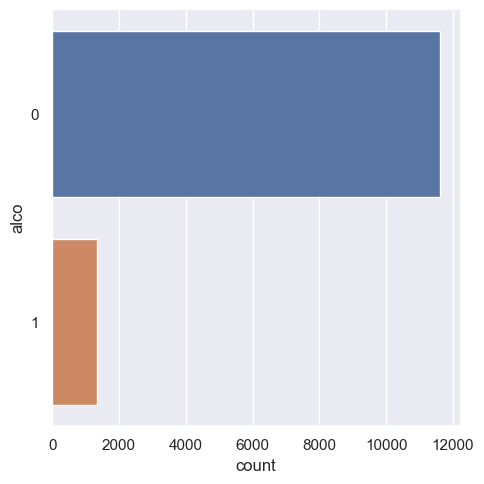

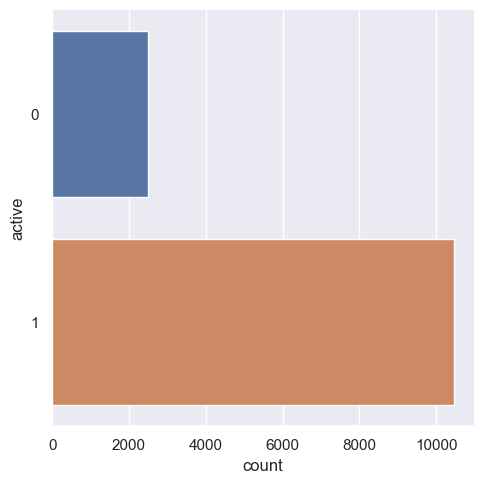

In [122]:
# Draw the cat plots of all categorical Predictors
sb.catplot(y = "cholesterol", data = X_mwo_train, kind = "count")
sb.catplot(y = "smoke", data = X_mwo_train, kind = "count")
sb.catplot(y = "alco", data = X_mwo_train, kind = "count")
sb.catplot(y = "active", data = X_mwo_train, kind = "count")

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7141204596282872

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7096923432801295

TPR (Train Dataset):  0.5428798727128082

TPR (Test Dataset):  0.5423255813953488


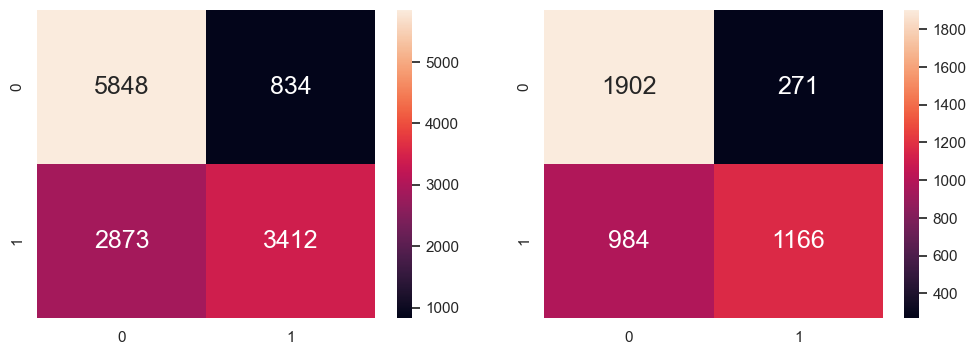

In [123]:
# Decision Tree using Train Data
dectree2 = DecisionTreeClassifier(max_depth = 3)
dectree2.fit(X_mwo_train, cardio_mwo_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
cardio_mwo_train_pred = dectree2.predict(X_mwo_train)
cardio_mwo_test_pred = dectree2.predict(X_mwo_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree2.score(X_mwo_train, cardio_mwo_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree2.score(X_mwo_test, cardio_mwo_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(cardio_mwo_train, cardio_mwo_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(cardio_mwo_test, cardio_mwo_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Check the TPR on Train Set
print("TPR (Train Dataset): ", recall_score(cardio_mwo_train, cardio_mwo_train_pred))
print()

# Check the TPR on Test Set
print("TPR (Test Dataset): ", recall_score(cardio_mwo_test, cardio_mwo_test_pred))

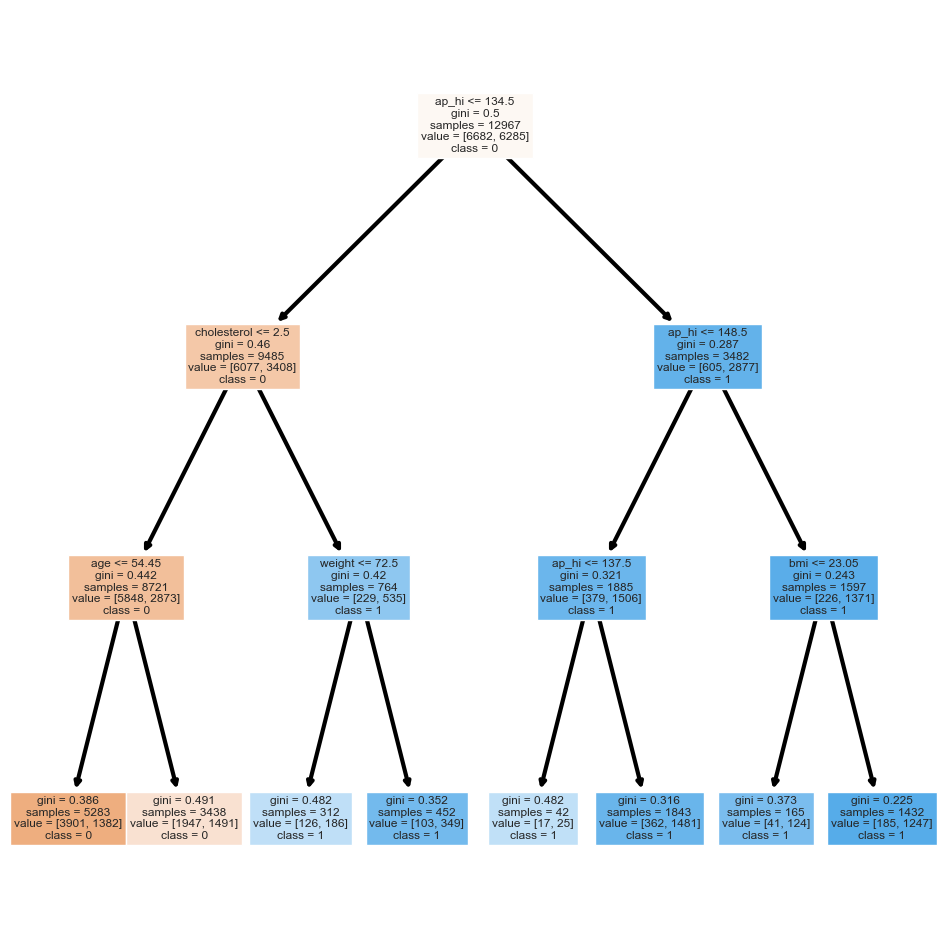

In [124]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree2, 
          feature_names = X_mwo_train.columns.tolist(),
          class_names = [str(x) for x in dectree2.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

As shown in the decision tree, the significant factors related to CVD in males are as follows: ap_hi, ap_lo, age, cholesterol. The significant factors are already different from the factors found in the female model.

---
<a id='mo'></a>
## Male With Outliers  
### Simple Decision Tree

We will use ap_hi as it has the highest correlation with cardio.

Response Variable : **cardio_mo**     
Predictor Feature : **ap_hi_mo** (systolic blood pressure)   

Extract the variables and the associated data as a Pandas `DataFrame`.

In [125]:
cardio_mo = pd.DataFrame(male_with_outliers['cardio'])  # Response
ap_hi_mo = pd.DataFrame(male_with_outliers['ap_hi'])    # Predictor

Set up the classification problem with Train and Test datasets.   
Test ratio = 0.25

In [126]:
# Split the Dataset into Train and Test
ap_hi_mo_train, ap_hi_mo_test, cardio_mo_train, cardio_mo_test = train_test_split(ap_hi_mo, cardio_mo, test_size = 0.25)

# Check the sample sizes
print("Train Set :", ap_hi_mo_train.shape, cardio_mo_train.shape)
print("Test Set  :", ap_hi_mo_test.shape, cardio_mo_test.shape)

Train Set : (13476, 1) (13476, 1)
Test Set  : (4493, 1) (4493, 1)


#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [127]:
# Summary Statistics for cardio_mo Train
cardio_mo_train["cardio"].value_counts()

1    6750
0    6726
Name: cardio, dtype: int64

In [128]:
# Summary Statistics for ap_hi_mo Train
ap_hi_mo_train.describe()

ap_hi
count  13476.000000
mean     128.176610
std       16.588468
min       70.000000
25%      120.000000
50%      120.000000
75%      140.000000
max      240.000000

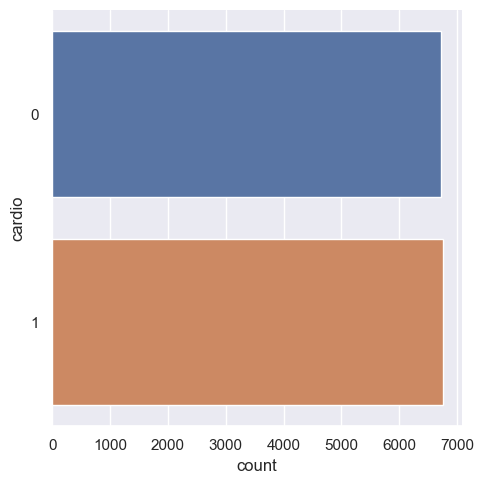

In [129]:
# Count Plot for cardio_mo Train
sb.catplot(y = "cardio", data = cardio_mo_train, kind = "count")

<Axes: >

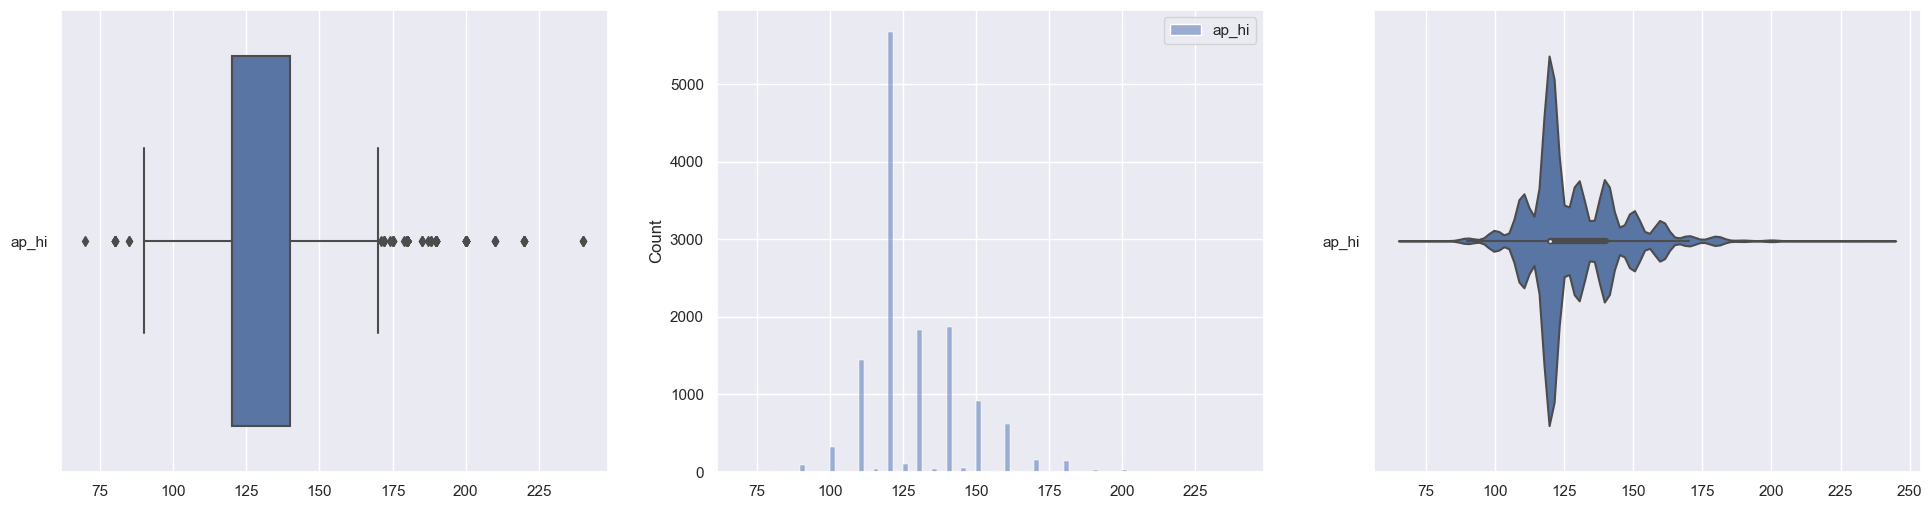

In [130]:
# Plot the distributions of ap_hi_mo Train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = ap_hi_mo_train, orient = "h", ax = axes[0])
sb.histplot(data = ap_hi_mo_train, ax = axes[1])
sb.violinplot(data = ap_hi_mo_train, orient = "h", ax = axes[2])

<Axes: xlabel='ap_hi', ylabel='cardio'>

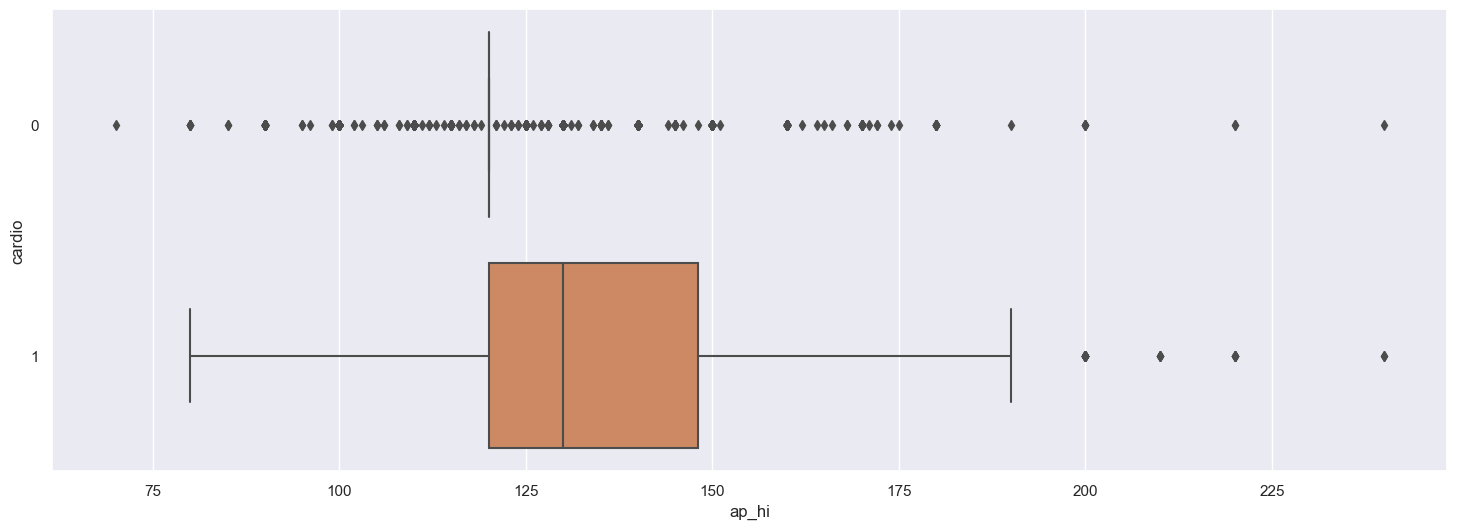

In [131]:
# Create a joint dataframe by concatenating ap_hi and cardio
trainDF_mo = pd.concat([ap_hi_mo_train, cardio_mo_train], axis = 1).reindex(ap_hi_mo_train.index)

# Joint Boxplot of cardio train against ap_hi train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "ap_hi", y = "cardio", data = trainDF_mo, orient = "h")

#### Decision Tree in Scikit-Learn


In [132]:
# Recall the cardio-ap_hi Dataset
cardio_mo = pd.DataFrame(male_with_outliers['cardio'])   # Response
ap_hi_mo = pd.DataFrame(male_with_outliers['ap_hi'])     # Predictor

# Split the cardio-ap_hi Dataset into Train and Test
ap_hi_mo_train, ap_hi_mo_test, cardio_mo_train, cardio_mo_test = train_test_split(ap_hi_mo, cardio_mo, test_size = 0.25)

In [133]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

Train the Decision Tree Classifier model `dectree` using the Train Set.   
Use `ap_hi_mo_train` as *Predictor* and `cardio_mo_train` as *Response*.

In [134]:
# Train the Decision Tree Classifier model
dectree.fit(ap_hi_mo_train, cardio_mo_train)

DecisionTreeClassifier(max_depth=2)

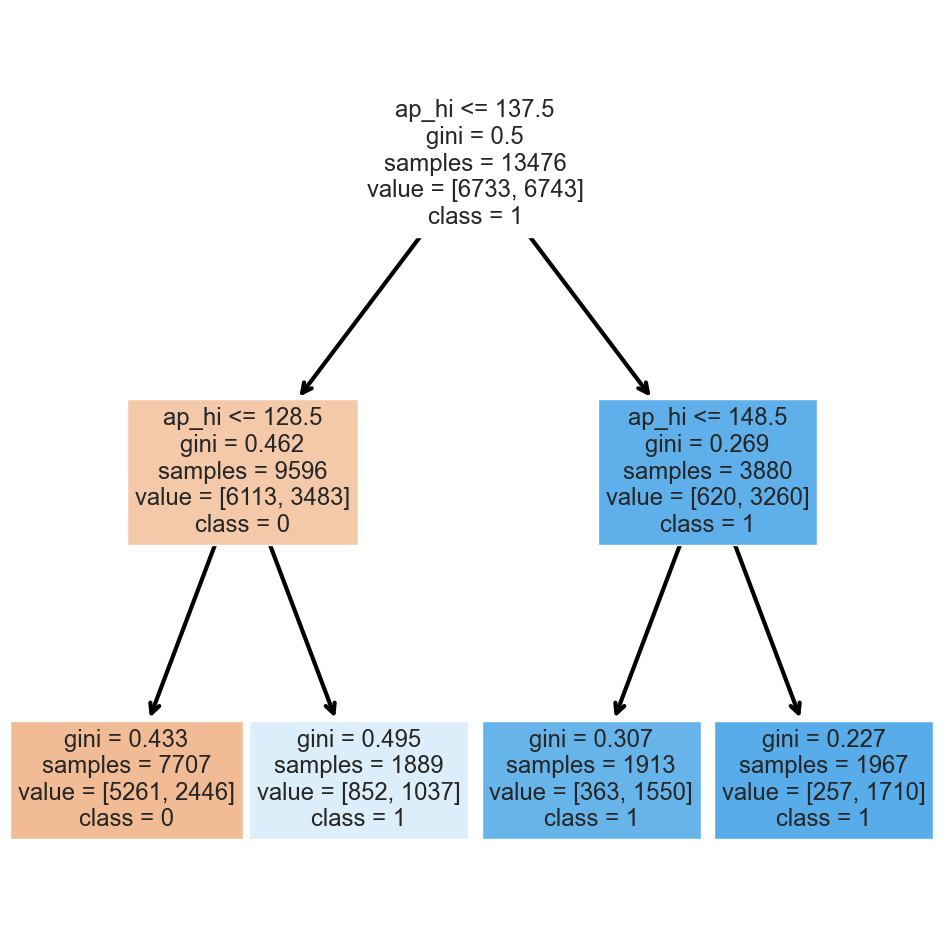

In [135]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = ap_hi_mo_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

#### Goodness of Fit of the Model

Check how good the predictions are on the Train Set.    
Metrics : Classification Accuracy and Confusion Matrix.

Classification Accuracy 	: 0.7092609082813891
TPR (Train Set) 	: 0.637253448020169


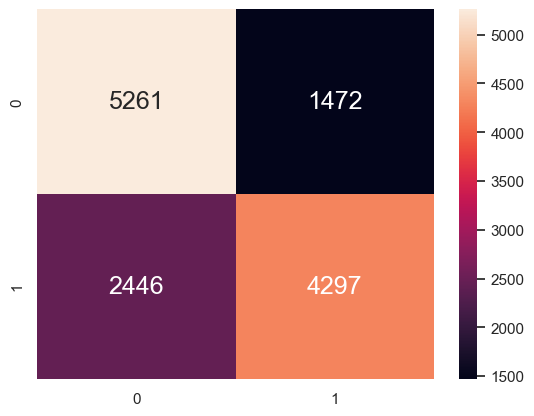

In [136]:
# Predict 
cardio_mo_train_pred = dectree.predict(ap_hi_mo_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(ap_hi_mo_train, cardio_mo_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(cardio_mo_train, cardio_mo_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#Print TPR
print("TPR (Train Set) \t:", recall_score(cardio_mo_train, cardio_mo_train_pred))

Classification Accuracy 	: 0.7162252392610727
TPR (Test Set) 	: 0.6387527839643653


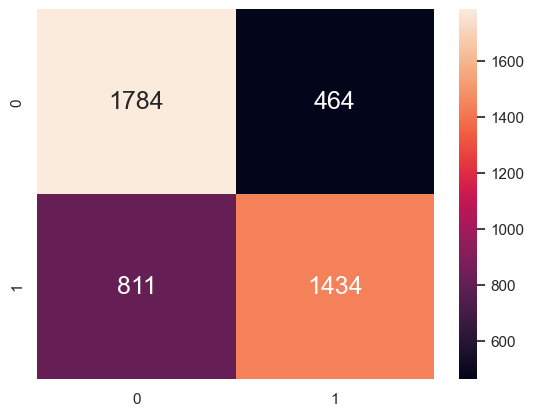

In [137]:
# Predict cardio corresponding to ap_hi_mwo Test
cardio_mo_test_pred = dectree.predict(ap_hi_mo_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(ap_hi_mo_test, cardio_mo_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(cardio_mo_test, cardio_mo_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#Print TPR
print("TPR (Test Set) \t:", recall_score(cardio_mo_test, cardio_mo_test_pred))

## Chi-Square Test of Independence

In [138]:
#Chi square test of cholesterol and cardio
crosstab_mo = pd.crosstab(male_with_outliers["cholesterol"], male_with_outliers["cardio"])
crosstab_mo, test_results_mo, expected_mo = rp.crosstab(male_with_outliers["cholesterol"], male_with_outliers["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_mo

Chi-square test   results
0  Pearson Chi-square ( 2.0) =   782.5447
1                    p-value =     0.0000
2                 Cramer's V =     0.2087

In [139]:
#Chi square test of glucose and cardio
crosstab_mo = pd.crosstab(male_with_outliers["gluc"], male_with_outliers["cardio"])
crosstab_mo, test_results_mo, expected_mo = rp.crosstab(male_with_outliers["gluc"], male_with_outliers["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_mo

Chi-square test   results
0  Pearson Chi-square ( 2.0) =   106.3199
1                    p-value =     0.0000
2                 Cramer's V =     0.0769

In [140]:
#Chi square test of smoke and cardio
crosstab_mo = pd.crosstab(male_with_outliers["smoke"], male_with_outliers["cardio"])
crosstab_mo, test_results_mo, expected_mo = rp.crosstab(male_with_outliers["smoke"], male_with_outliers["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_mo

Chi-square test  results
0  Pearson Chi-square ( 1.0) =   17.4322
1                    p-value =    0.0000
2               Cramer's phi =    0.0311

In [141]:
#Chi square test of alcohol and cardio
crosstab_mo = pd.crosstab(male_with_outliers["alco"], male_with_outliers["cardio"])
crosstab_mo, test_results_mo, expected_mo = rp.crosstab(male_with_outliers["alco"], male_with_outliers["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_mo

Chi-square test  results
0  Pearson Chi-square ( 1.0) =    3.8755
1                    p-value =    0.0490
2               Cramer's phi =    0.0147

In [142]:
#Chi square test of active and cardio
crosstab_mo = pd.crosstab(male_with_outliers["active"], male_with_outliers["cardio"])
crosstab_mo, test_results_mo, expected_mo = rp.crosstab(male_with_outliers["active"], male_with_outliers["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_mo

Chi-square test  results
0  Pearson Chi-square ( 1.0) =   42.1009
1                    p-value =    0.0000
2               Cramer's phi =    0.0484

It can be seen that at 5% significance level, cholesterol, glucose, smoke, alcohol and active are all significant in predicting risk of cardiovascular disease as their respective p-values are below 0.05. Cholesterol had a strong relationship with cardiovascular disease, glucose had a weak relationship, smoke, alcohol and active had very weak relationships.

---
<a id='multi_tree'></a>
## Multi-Variate Classification Tree

We will now set up a Multi-Variate Classification problem.
We will use the factors that are significant according to the Chi-Square test alongside the numerical variables.

Response Variable : **Cardio**     
Predictor Feature : **Age, Ap_hi, Ap_lo, Weight, BMI, Cholesterol, Glucose, Smoke, Alcohol, Active**       

Extract the variables and the associated data as a Pandas `DataFrame`.

In [143]:
#Extract Response and Predictors
cardio_mo = pd.DataFrame(male_with_outliers["cardio"])
X_mo = pd.DataFrame(male_with_outliers[["age", "ap_hi", "ap_lo", "weight", "bmi", "cholesterol", "gluc", "smoke", "alco", "active"]])

In [144]:
# Split the Dataset into Train and Test
X_mo_train, X_mo_test, cardio_mo_train, cardio_mo_test = train_test_split(X_mo, cardio_mo, test_size = 0.25)

# Check the sample sizes
print("Train Set :", cardio_mo_train.shape, X_mo_train.shape)
print("Test Set  :", cardio_mo_test.shape, X_mo_test.shape)

Train Set : (13476, 1) (13476, 10)
Test Set  : (4493, 1) (4493, 10)


#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [145]:
# Summary Statistics for Response
cardio_mo_train["cardio"].value_counts()

1    6749
0    6727
Name: cardio, dtype: int64

In [146]:
# Summary Statistics for Predictors
X_mo_train.describe()

age         ap_hi         ap_lo        weight           bmi  \
count  13476.000000  13476.000000  13476.000000  13476.000000  13476.000000   
mean      53.130988    128.053799     82.158504     77.179371     26.723464   
std        6.943793     16.482299      9.353917     14.107801      5.030415   
min       39.100000     24.000000      7.000000     22.000000      7.000000   
25%       47.900000    120.000000     80.000000     68.000000     23.700000   
50%       53.800000    120.000000     80.000000     75.000000     25.900000   
75%       58.400000    140.000000     90.000000     85.000000     29.000000   
max       65.000000    240.000000    140.000000    200.000000    180.700000   

        cholesterol          gluc         smoke          alco        active  
count  13476.000000  13476.000000  13476.000000  13476.000000  13476.000000  
mean       1.329178      1.207183      0.220540      0.103740      0.809513  
std        0.650946      0.547793      0.414626      0.304934      0.392700  
min        1.000000      1.000000      0.000000      0.000000      0.000000  
25%        1.000000      1.000000      0.000000      0.000000      1.000000  
50%        1.000000      1.000000      0.000000      0.000000      1.000000  
75%        1.000000      1.000000      0.000000      0.000000      1.000000  
max        3.000000      3.000000      1.000000      1.000000      1.000000

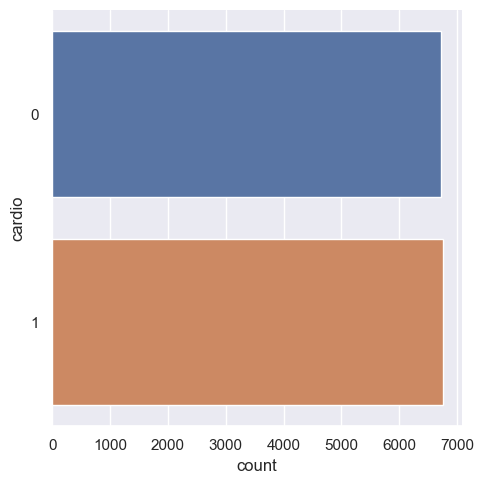

In [147]:
# Draw the distribution of Response
sb.catplot(y = "cardio", data = cardio_mo_train, kind = "count")

KeyError: 0

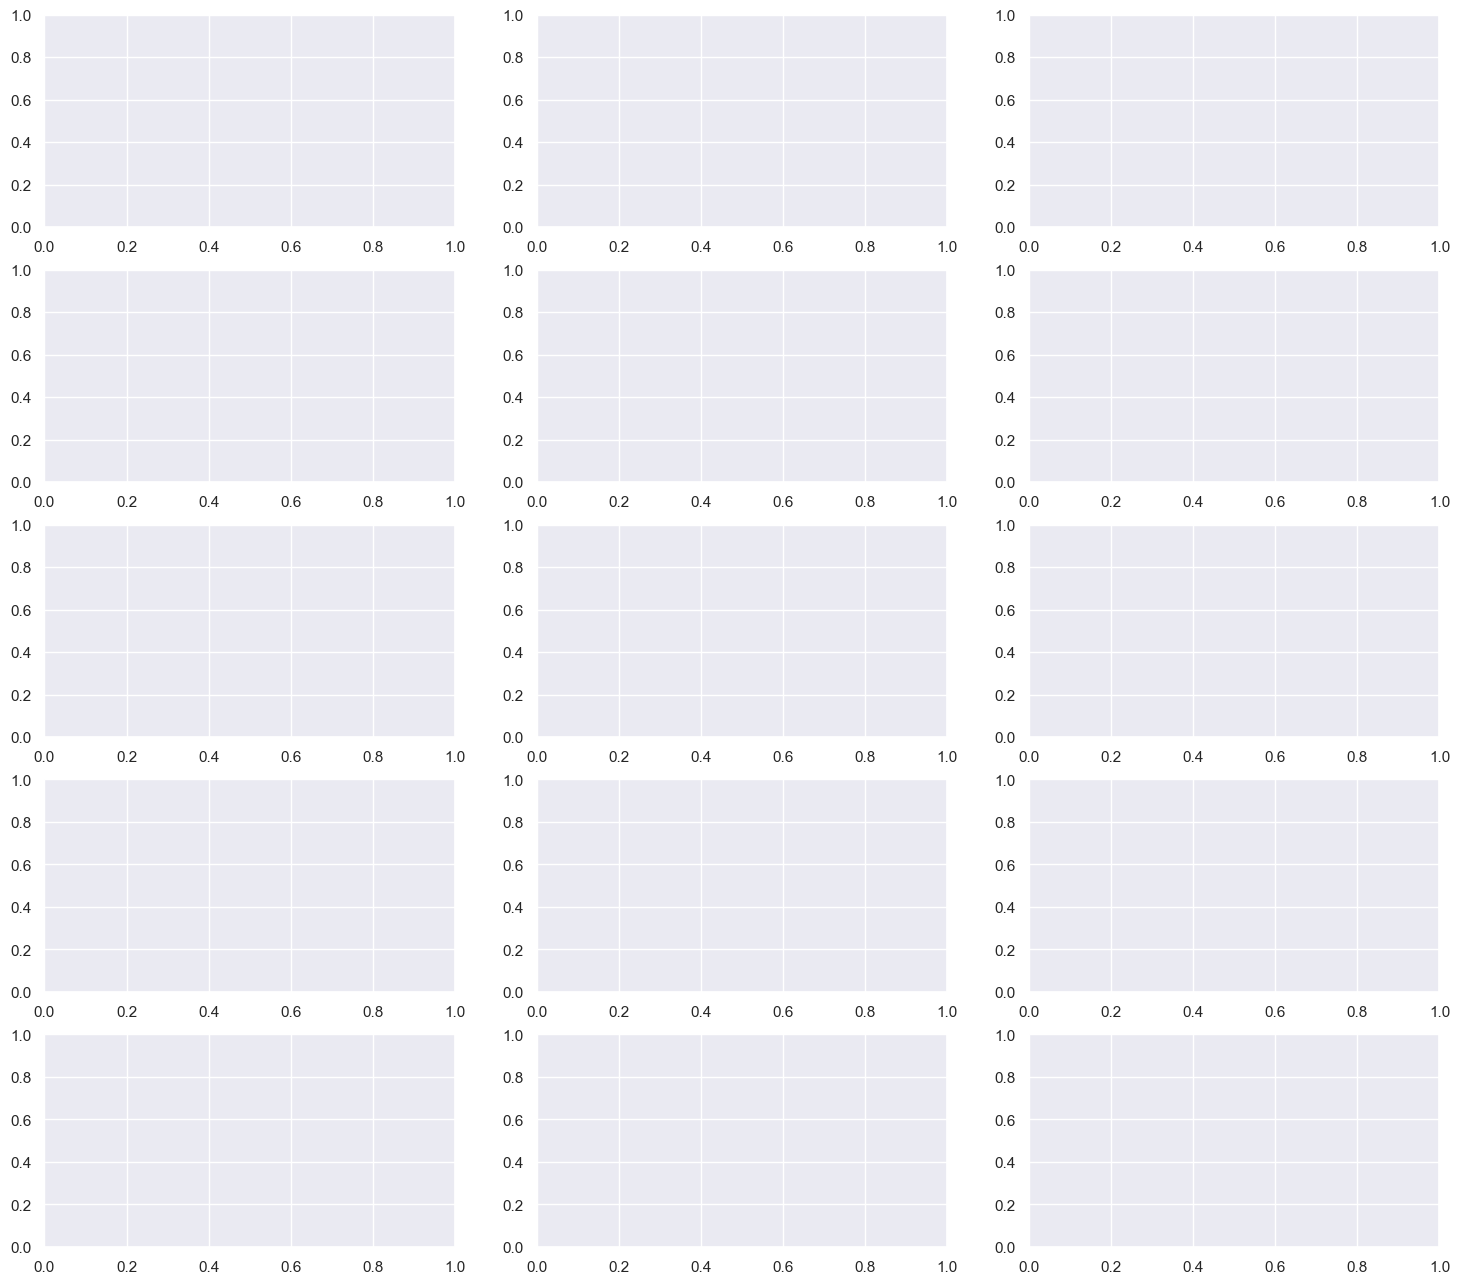

In [148]:
# Draw the distributions of all numerical Predictors
X_mo_train_numerical = pd.DataFrame(X_mo_train[["age", "ap_hi", "ap_lo", "weight", "bmi"]])
f, axes = plt.subplots(5, 3, figsize=(18, 16))

count = 0
for var in X_mo_train_numerical:
    sb.boxplot(data = X_mo_train_numerical[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = X_mo_train_numerical[var], ax = axes[count,1])
    sb.violinplot(data = X_mo_train_numerical[var], orient = "h", ax = axes[count,2])
    count += 1

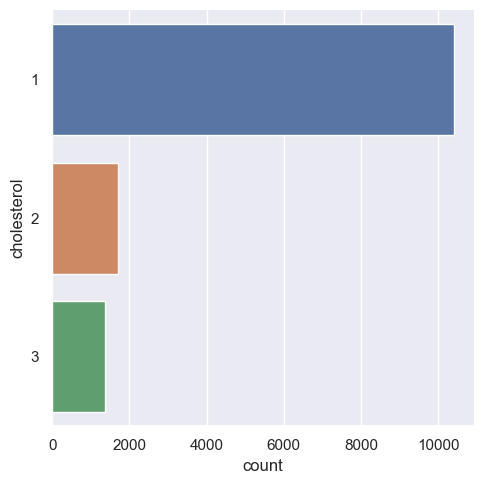

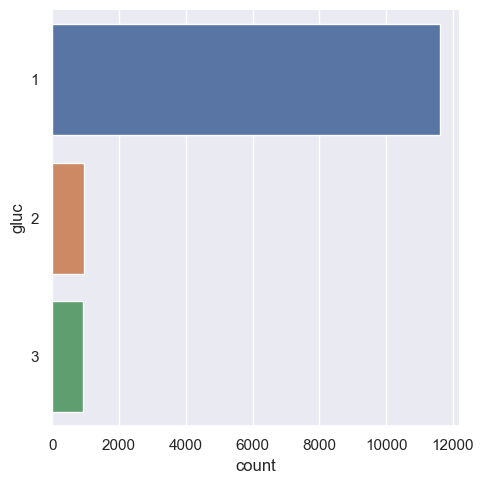

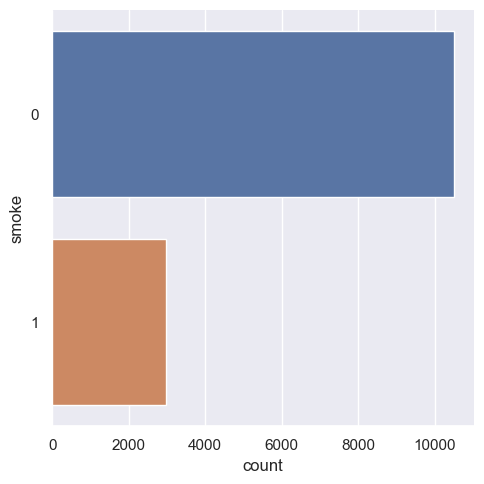

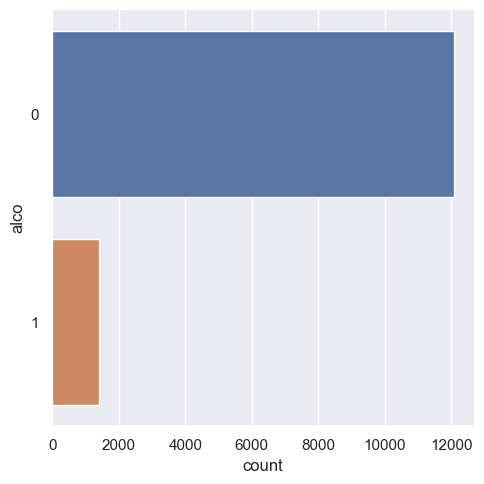

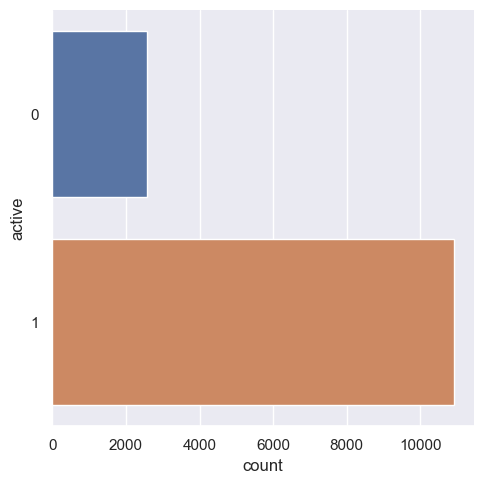

In [149]:
#Display the cat plots for all categorical predictors
sb.catplot(y = "cholesterol", data = X_mo_train, kind = "count")
sb.catplot(y = "gluc", data = X_mo_train, kind = "count")
sb.catplot(y = "smoke", data = X_mo_train, kind = "count")
sb.catplot(y = "alco", data = X_mo_train, kind = "count")
sb.catplot(y = "active", data = X_mo_train, kind = "count")

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7075541703769664

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7213443133763632

TPR (Train Dataset):  0.6320936435027411

TPR (Test Dataset):  0.6520768200089325


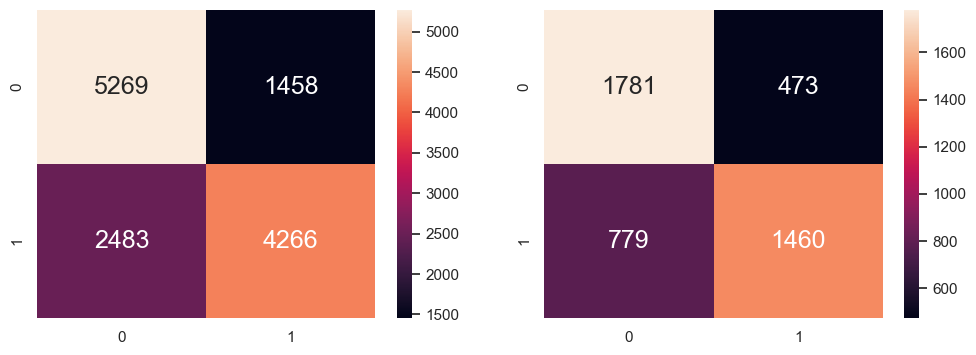

In [150]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)
dectree.fit(X_mo_train, cardio_mo_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
cardio_mo_train_pred = dectree.predict(X_mo_train)
cardio_mo_test_pred = dectree.predict(X_mo_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_mo_train, cardio_mo_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_mo_test, cardio_mo_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(cardio_mo_train, cardio_mo_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(cardio_mo_test, cardio_mo_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Check the TPR on Train Set
print("TPR (Train Dataset): ", recall_score(cardio_mo_train, cardio_mo_train_pred))
print()

# Check the TPR on Test Set
print("TPR (Test Dataset): ", recall_score(cardio_mo_test, cardio_mo_test_pred))

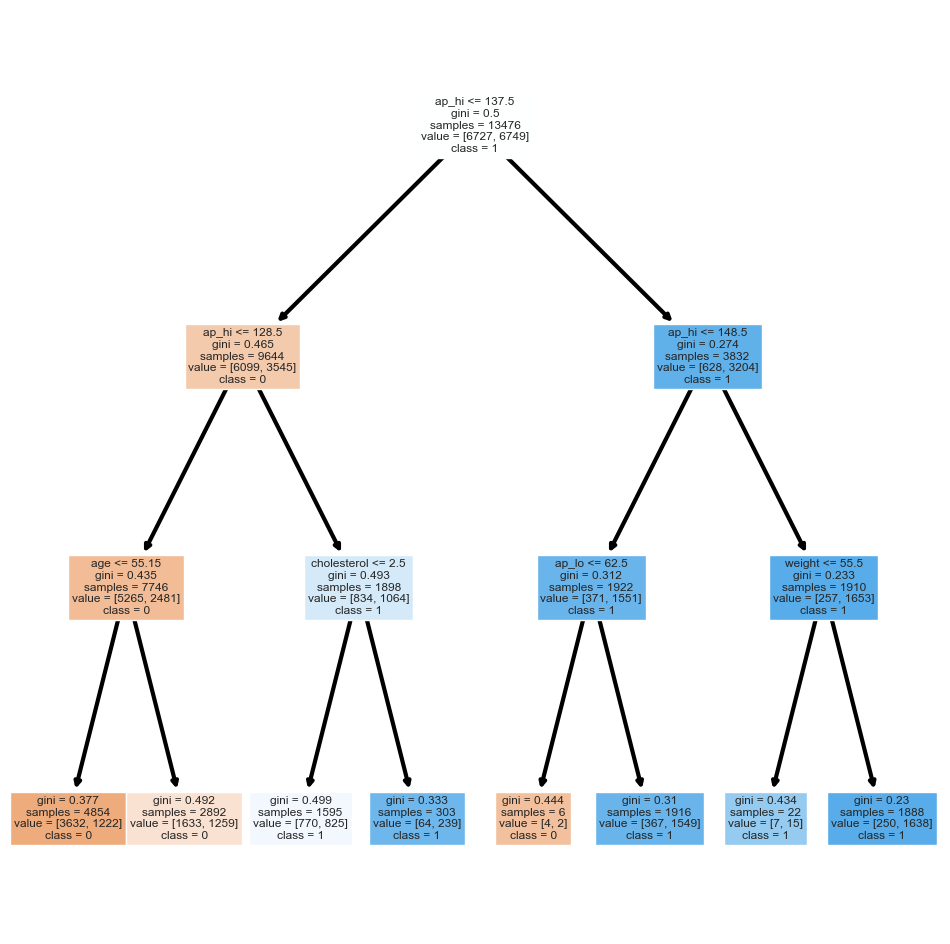

In [151]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_mo_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

From the decision tree, we observe that the most significant factors related to CVD in males with outliers are ap_hi, age, cholesterol and ap_lo.

<a id='test'></a>
# Analysis on Test Set

#### Split test model by gender
We found that splitting by gender is effective as there are different factors related to risk of cardiovascular disease in each gender.
We will be using the model without outliers, classification accuracy of both models were similar, however repeated runs of the algorithm showed that the significant variables for the model with outliers tended to fluctuate and change, especially with regards to the categorical variables. This could be due to the very weak relationships with some of the significant categorical variables. As such, we will be using the model without outliers as results of the significant variables (both numerical and categorical) were more consistent.

In [152]:
# Split model training dataset without outliers
female_test_df = model2_test[model2_test['gender'] == 1]
male_test_df = model2_test[model2_test['gender'] == 2]

In [153]:
# Save datasets
female_test_df.to_csv('female_without_outliers_test.csv', sep = ',', index = False)
male_test_df.to_csv('male_without_outliers_test.csv', sep = ',', index = False)

In [154]:
female_without_outliers_test = pd.read_csv('female_without_outliers_test.csv')
female_without_outliers_test.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0  60.8       1     169    69.0    110     70            1     1      1     0   
1  43.8       1     161    48.0    120     80            1     1      0     0   
2  54.2       1     159    67.0    110     80            1     3      0     0   
3  47.8       1     160    64.0    150     90            2     1      0     1   
4  44.3       1     165    65.0    140    100            1     1      0     0   

   active  cardio   bmi  
0       1       1  24.2  
1       1       0  18.5  
2       1       0  26.5  
3       1       1  25.0  
4       1       1  23.9

In [155]:
male_without_outliers_test = pd.read_csv('male_without_outliers_test.csv')
male_without_outliers_test.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0  54.4       2     178    82.0    120     80            2     1      1     0   
1  55.2       2     169    80.0    130     90            1     1      0     0   
2  56.8       2     170    69.0    140     80            3     3      0     0   
3  57.6       2     172    78.0    120     70            1     1      0     0   
4  39.6       2     174    84.0     90     60            1     1      0     1   

   active  cardio   bmi  
0       1       1  25.9  
1       0       1  28.0  
2       0       1  23.9  
3       1       0  26.4  
4       0       0  27.7

## Female Without Outliers Test

### Chi-Square Test of Independence

In [156]:
#Chi square test on cholesterol and cardio
crosstab_fwo_test = pd.crosstab(female_without_outliers_test["cholesterol"], female_without_outliers_test["cardio"])
crosstab_fwo_test, test_results_fwo_test, expected_fwo_test = rp.crosstab(female_without_outliers_test["cholesterol"], female_without_outliers_test["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_fwo_test

Chi-square test   results
0  Pearson Chi-square ( 2.0) =   565.5943
1                    p-value =     0.0000
2                 Cramer's V =     0.2289

In [157]:
#Chi square test on glucose and cardio
crosstab_fwo_test = pd.crosstab(female_without_outliers_test["gluc"], female_without_outliers_test["cardio"])
crosstab_fwo_test, test_results_fwo_test, expected_fwo_test = rp.crosstab(female_without_outliers_test["gluc"], female_without_outliers_test["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_fwo_test

Chi-square test   results
0  Pearson Chi-square ( 2.0) =   117.3243
1                    p-value =     0.0000
2                 Cramer's V =     0.1043

In [158]:
#Chi square test on smoke and cardio
crosstab_fwo_test = pd.crosstab(female_without_outliers_test["smoke"], female_without_outliers_test["cardio"])
crosstab_fwo_test, test_results_fwo_test, expected_fwo_test = rp.crosstab(female_without_outliers_test["smoke"], female_without_outliers_test["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_fwo_test

Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.6562
1                    p-value =    0.4179
2               Cramer's phi =    0.0078

In [159]:
#Chi square test on alcohol and cardio
crosstab_fwo_test = pd.crosstab(female_without_outliers_test["alco"], female_without_outliers_test["cardio"])
crosstab_fwo_test, test_results_fwo_test, expected_fwo_test = rp.crosstab(female_without_outliers_test["alco"], female_without_outliers_test["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_fwo_test

Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.0705
1                    p-value =    0.7906
2               Cramer's phi =    0.0026

In [160]:
#Chi square test on active and cardio
crosstab_fwo_test = pd.crosstab(female_without_outliers_test["active"], female_without_outliers_test["cardio"])
crosstab_fwo_test, test_results_fwo_test, expected_fwo_test = rp.crosstab(female_without_outliers_test["active"], female_without_outliers_test["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_fwo_test

Chi-square test  results
0  Pearson Chi-square ( 1.0) =    6.1125
1                    p-value =    0.0134
2               Cramer's phi =    0.0238

It can be seen that at 5% significance level, active, glucose and cholesterol are all significant in predicting risk of cardiovascular disease as their respective p-values are below 0.05. This is consistent with the results of FWO train set.

### Multi-Variate Classification Tree

In [161]:
# Extract Response and Predictors
cardio_fwo_test = pd.DataFrame(female_without_outliers_test["cardio"])
X_fwo_test = pd.DataFrame(female_without_outliers_test[["age", "ap_hi", "ap_lo", "weight", "bmi", "cholesterol", "gluc", "active"]])

In [162]:
# Summary Statistics for Response
cardio_fwo_test["cardio"].value_counts()

0    5576
1    5217
Name: cardio, dtype: int64

In [163]:
# Summary Statistics for Predictors
X_fwo_test.describe()

age         ap_hi         ap_lo        weight           bmi  \
count  10793.000000  10793.000000  10793.000000  10793.000000  10793.000000   
mean      53.417762    124.778468     80.360419     71.422725     27.430057   
std        6.629252     15.203443      8.809479     12.416900      4.841318   
min       39.100000     80.000000     55.000000     34.000000     14.700000   
25%       49.400000    120.000000     80.000000     63.000000     23.900000   
50%       54.000000    120.000000     80.000000     70.000000     26.600000   
75%       58.400000    130.000000     90.000000     79.000000     30.500000   
max       64.900000    174.000000    108.000000    116.000000     41.600000   

        cholesterol          gluc        active  
count  10793.000000  10793.000000  10793.000000  
mean       1.367646      1.224219      0.800704  
std        0.681291      0.570412      0.399489  
min        1.000000      1.000000      0.000000  
25%        1.000000      1.000000      1.000000  
50%        1.000000      1.000000      1.000000  
75%        2.000000      1.000000      1.000000  
max        3.000000      3.000000      1.000000

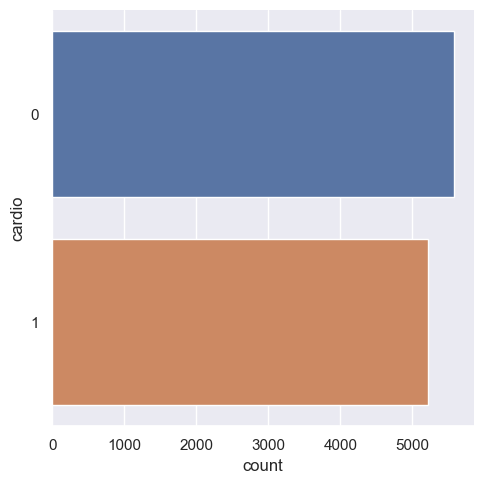

In [164]:
# Draw the distribution of Response
sb.catplot(y = "cardio", data = cardio_fwo_test, kind = "count")

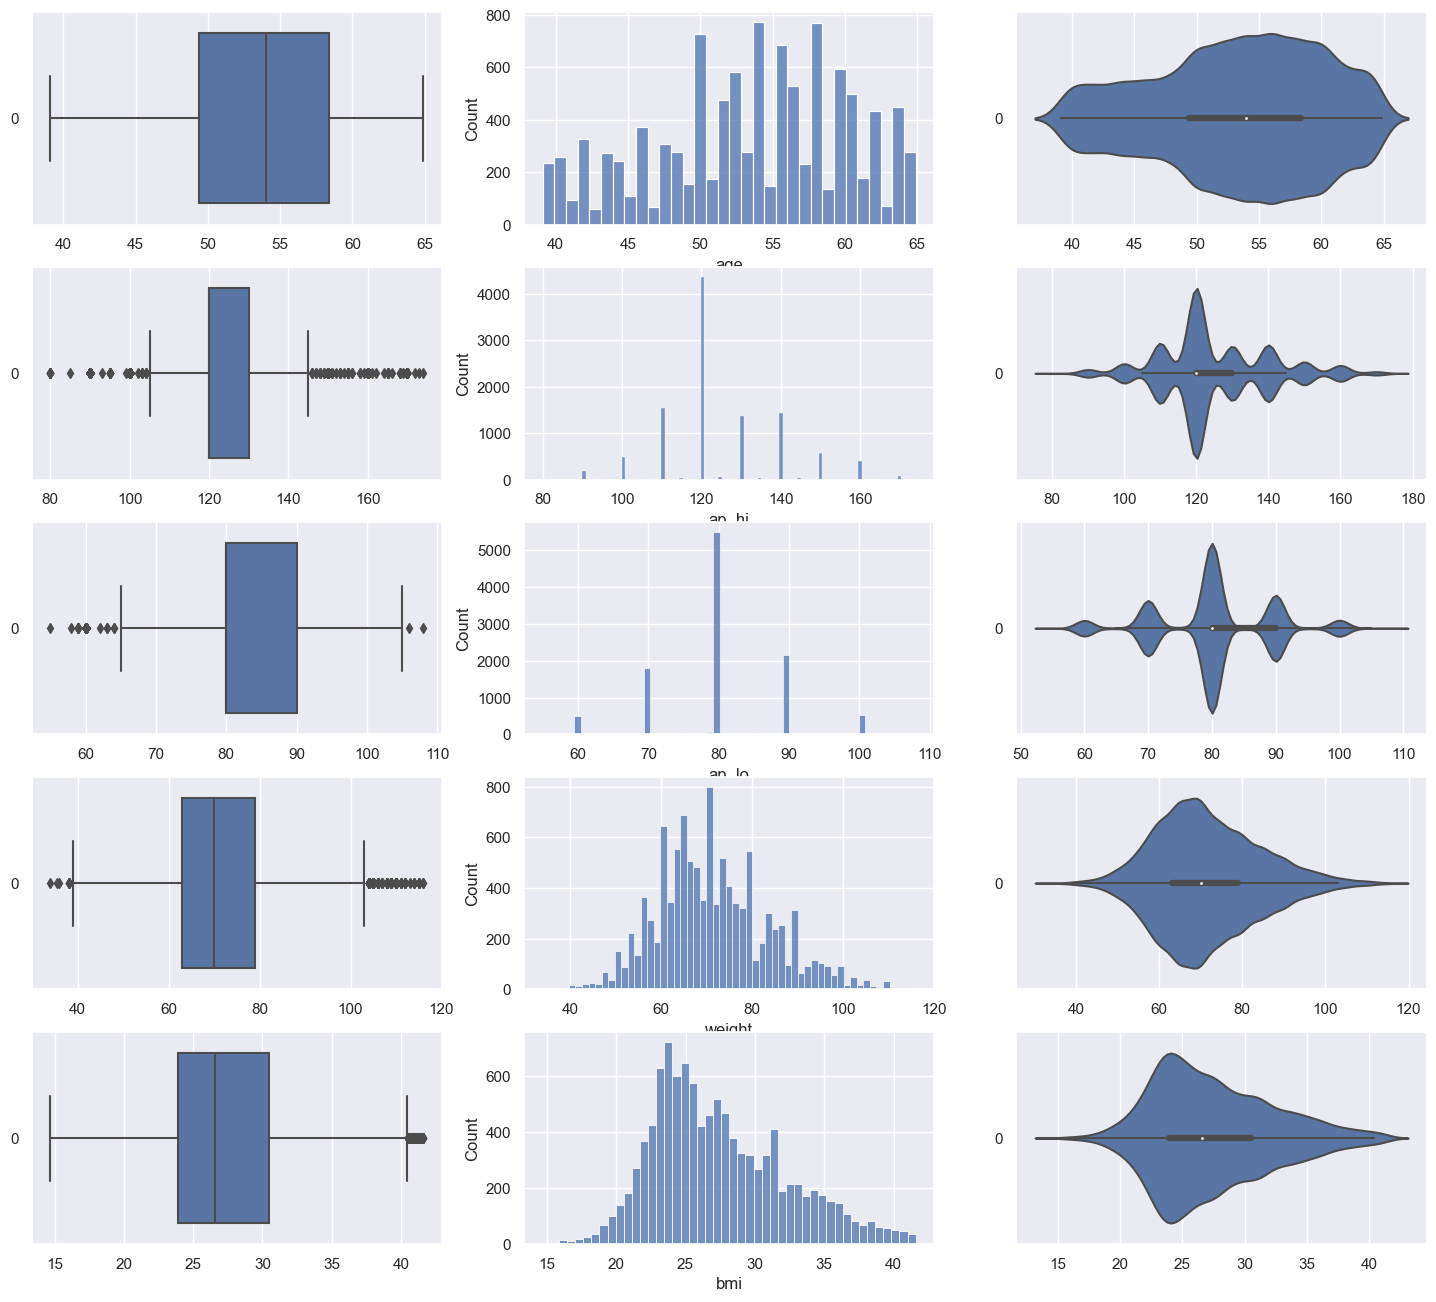

In [165]:
# Draw the distributions of all numerical Predictors
X_fwo_test_numerical = pd.DataFrame(female_without_outliers_test[["age", "ap_hi", "ap_lo", "weight", "bmi"]])
f, axes = plt.subplots(5, 3, figsize=(18, 16))

count = 0
for var in X_fwo_test_numerical:
    sb.boxplot(data = X_fwo_test_numerical[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = X_fwo_test_numerical[var], ax = axes[count,1])
    sb.violinplot(data = X_fwo_test_numerical[var], orient = "h", ax = axes[count,2])
    count += 1

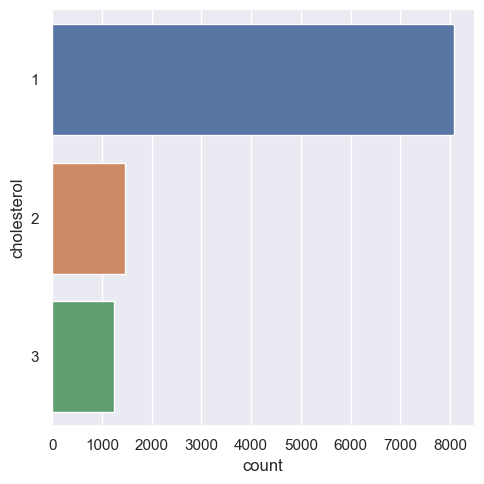

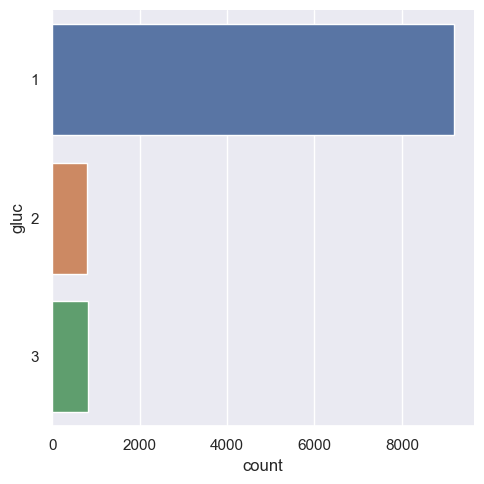

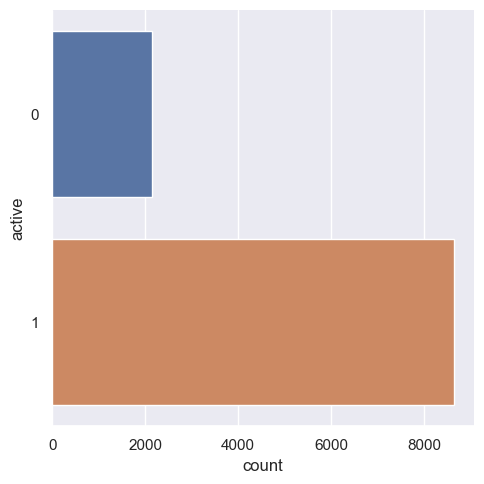

In [166]:
# Display the cat plots of all categorical Predictors
sb.catplot(y = "cholesterol", data = X_fwo_test, kind = "count")
sb.catplot(y = "gluc", data = X_fwo_test, kind = "count")
sb.catplot(y = "active", data = X_fwo_test, kind = "count")

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7210228852033725

TPR (Test Dataset):  0.639064596511405


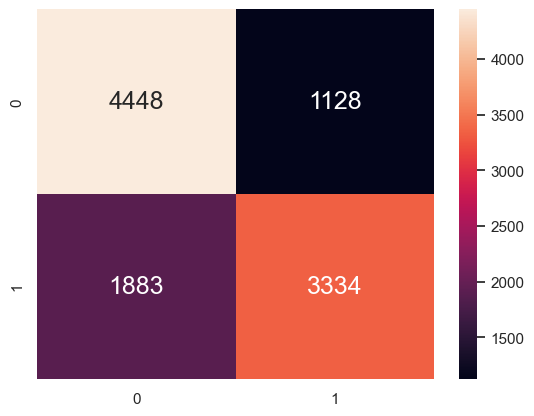

In [167]:
# Predict Response corresponding to Predictors
cardio_fwo_test_pred = dectree1.predict(X_fwo_test)

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree1.score(X_fwo_test, cardio_fwo_test))
print()

# Plot the Confusion Matrix for Train and Test
sb.heatmap(confusion_matrix(cardio_fwo_test, cardio_fwo_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Check the TPR on Test Set
print("TPR (Test Dataset): ", recall_score(cardio_fwo_test, cardio_fwo_test_pred))

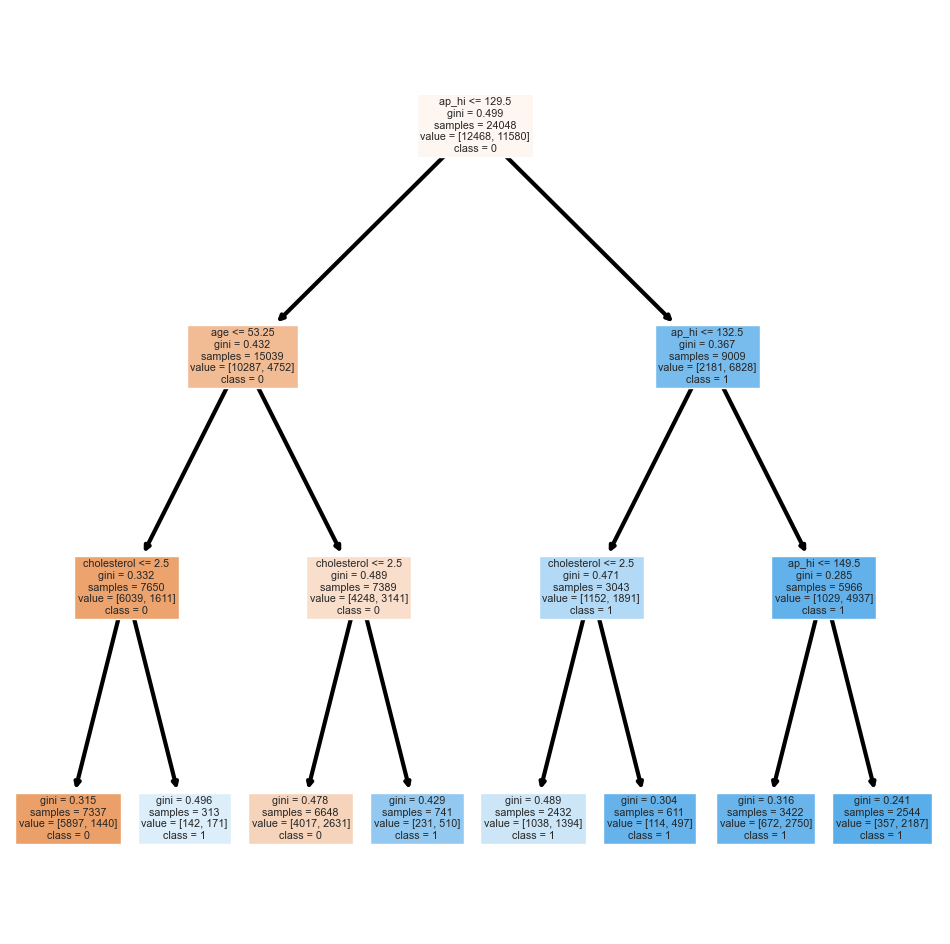

In [168]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree1, 
          feature_names = X_fwo_test.columns.tolist(),
          class_names = [str(x) for x in dectree1.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Significant variables that predict cardiovascular disease for females are ap_hi, age and cholesterol.

## Male Without Outliers Test

### Chi-Square Test of Independence

In [169]:
#Chi square test for cholesterol and cardio
crosstab_mwo_test = pd.crosstab(male_without_outliers_test["cholesterol"], male_without_outliers_test["cardio"])
crosstab_mwo_test, test_results_mwo_test, expected_mwo_test = rp.crosstab(male_without_outliers_test["cholesterol"], male_without_outliers_test["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_mwo_test

Chi-square test   results
0  Pearson Chi-square ( 2.0) =   257.7260
1                    p-value =     0.0000
2                 Cramer's V =     0.2134

In [170]:
#Chi square test for glucose and cardio
crosstab_mwo_test = pd.crosstab(male_without_outliers_test["gluc"], male_without_outliers_test["cardio"])
crosstab_mwo_test, test_results_mwo_test, expected_mwo_test = rp.crosstab(male_without_outliers_test["gluc"], male_without_outliers_test["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_mwo_test

Chi-square test  results
0  Pearson Chi-square ( 2.0) =   24.8494
1                    p-value =    0.0000
2                 Cramer's V =    0.0663

In [171]:
#Chi square test for smoke and cardio
crosstab_mwo_test = pd.crosstab(male_without_outliers_test["smoke"], male_without_outliers_test["cardio"])
crosstab_mwo_test, test_results_mwo_test, expected_mwo_test = rp.crosstab(male_without_outliers_test["smoke"], male_without_outliers_test["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_mwo_test

Chi-square test  results
0  Pearson Chi-square ( 1.0) =    2.9027
1                    p-value =    0.0884
2               Cramer's phi =    0.0226

In [172]:
#Chi square test for alcohol and cardio
crosstab_mwo_test = pd.crosstab(male_without_outliers_test["alco"], male_without_outliers_test["cardio"])
crosstab_mwo_test, test_results_mwo_test, expected_mwo_test = rp.crosstab(male_without_outliers_test["alco"], male_without_outliers_test["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_mwo_test

Chi-square test  results
0  Pearson Chi-square ( 1.0) =    1.9289
1                    p-value =    0.1649
2               Cramer's phi =    0.0185

In [173]:
#Chi square test for active and cardio
crosstab_mwo_test = pd.crosstab(male_without_outliers_test["active"], male_without_outliers_test["cardio"])
crosstab_mwo_test, test_results_mwo_test, expected_mwo_test = rp.crosstab(male_without_outliers_test["active"], male_without_outliers_test["cardio"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results_mwo_test

Chi-square test  results
0  Pearson Chi-square ( 1.0) =   11.9145
1                    p-value =    0.0006
2               Cramer's phi =    0.0459

It can be seen that at 5% significance level, active, smoke, alcohol and cholesterol are all significant in predicting risk of cardiovascular disease as their respective p-values are below 0.05. This is consistent with the results of MWO train set.

### Multi-Variate Classification Tree

In [174]:
# Extract Response and Predictors
cardio_mwo_test = pd.DataFrame(male_without_outliers_test["cardio"])
X_mwo_test = pd.DataFrame(male_without_outliers_test[["age", "ap_hi", "ap_lo", "weight", "bmi", "cholesterol", "smoke", "alco", "active"]])

In [175]:
# Summary Statistics for Response
cardio_mwo_test["cardio"].value_counts()

0    2905
1    2754
Name: cardio, dtype: int64

In [176]:
# Summary Statistics for Predictors
X_mwo_test.describe()

age        ap_hi        ap_lo       weight          bmi  \
count  5659.000000  5659.000000  5659.000000  5659.000000  5659.000000   
mean     53.148259   126.910938    81.861283    76.481675    26.498851   
std       6.943491    14.205351     8.304220    12.684202     3.938426   
min      39.100000    80.000000    59.000000    43.000000    14.600000   
25%      47.900000   120.000000    80.000000    68.000000    23.800000   
50%      53.900000   120.000000    80.000000    75.000000    25.900000   
75%      58.400000   140.000000    90.000000    85.000000    28.700000   
max      64.900000   174.000000   104.000000   116.000000    40.900000   

       cholesterol        smoke         alco       active  
count  5659.000000  5659.000000  5659.000000  5659.000000  
mean      1.330270     0.218767     0.101961     0.812511  
std       0.648805     0.413446     0.302624     0.390338  
min       1.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     0.000000     1.000000  
50%       1.000000     0.000000     0.000000     1.000000  
75%       1.000000     0.000000     0.000000     1.000000  
max       3.000000     1.000000     1.000000     1.000000

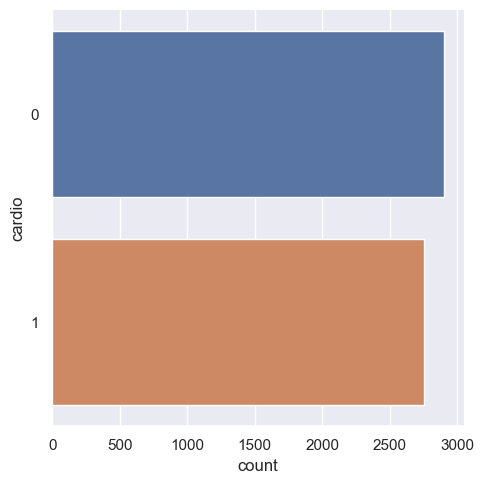

In [177]:
# Draw the distribution of Response
sb.catplot(y = "cardio", data = cardio_mwo_test, kind = "count")

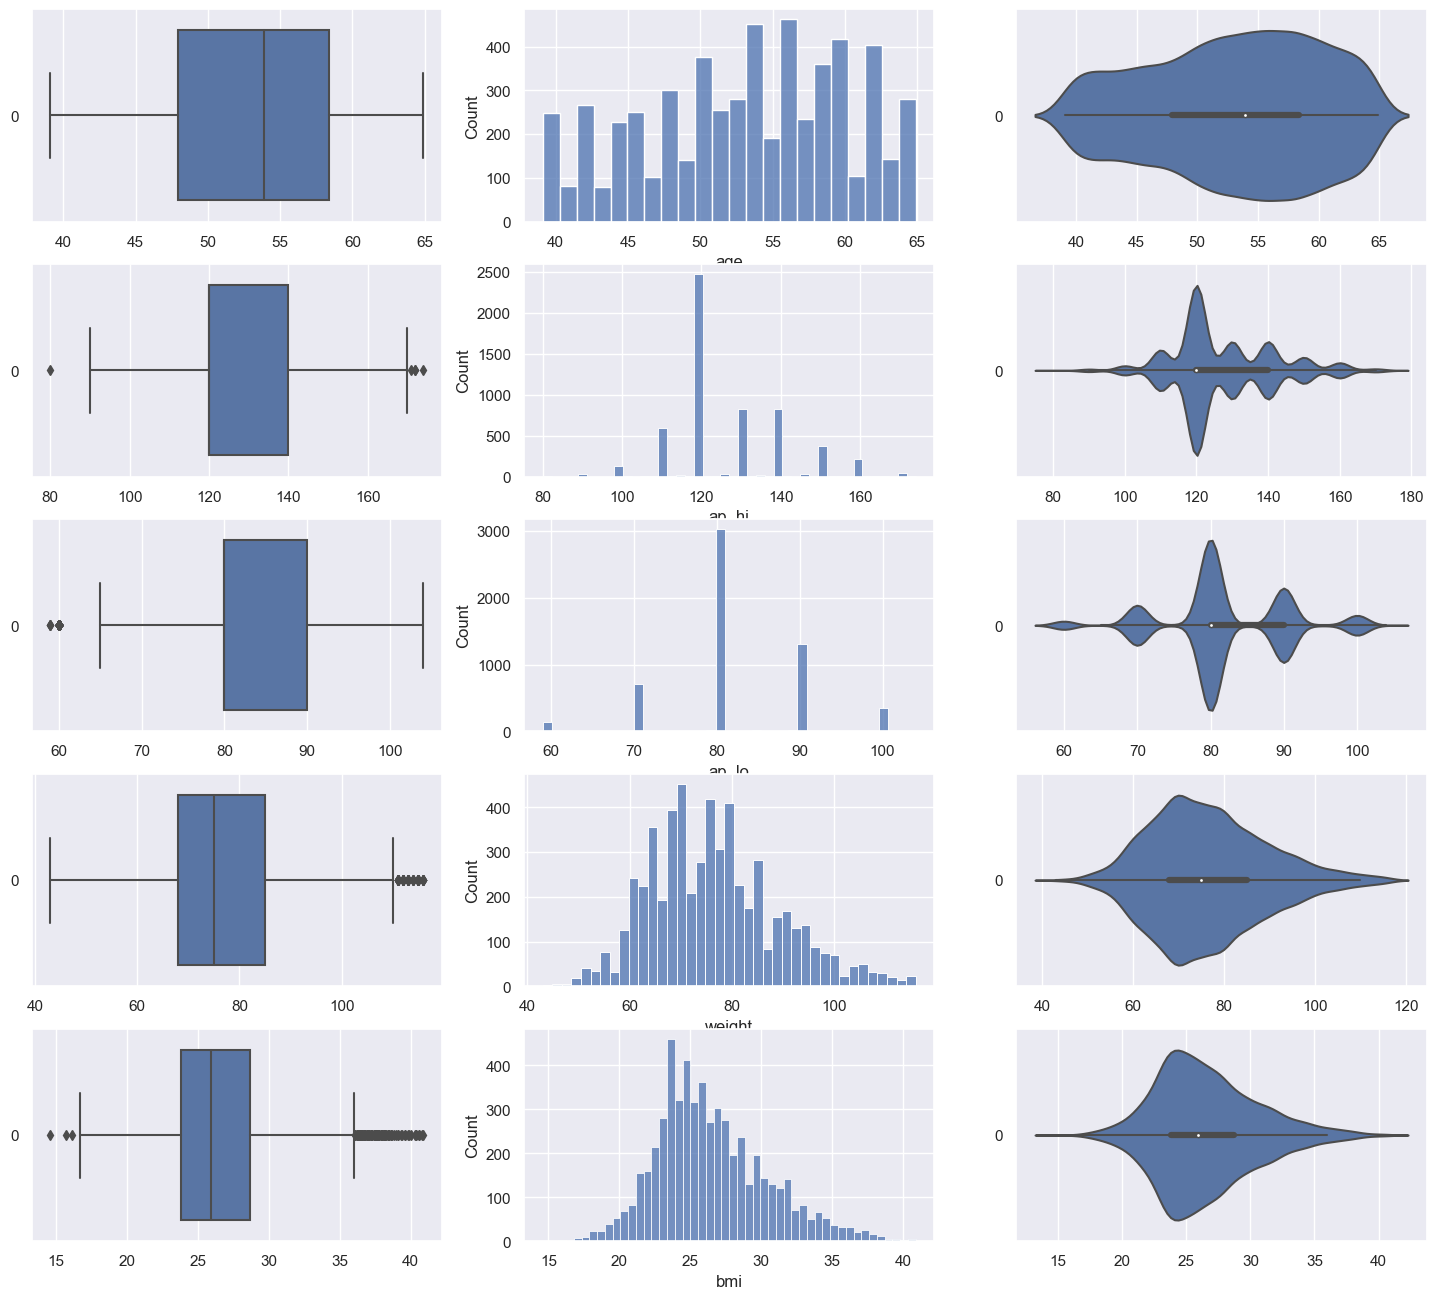

In [178]:
# Draw the distributions of all numerical Predictors
X_mwo_test_numerical = pd.DataFrame(male_without_outliers_test[["age", "ap_hi", "ap_lo", "weight", "bmi"]])
f, axes = plt.subplots(5, 3, figsize=(18, 16))

count = 0
for var in X_mwo_test_numerical:
    sb.boxplot(data = X_mwo_test_numerical[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = X_mwo_test_numerical[var], ax = axes[count,1])
    sb.violinplot(data = X_mwo_test_numerical[var], orient = "h", ax = axes[count,2])
    count += 1

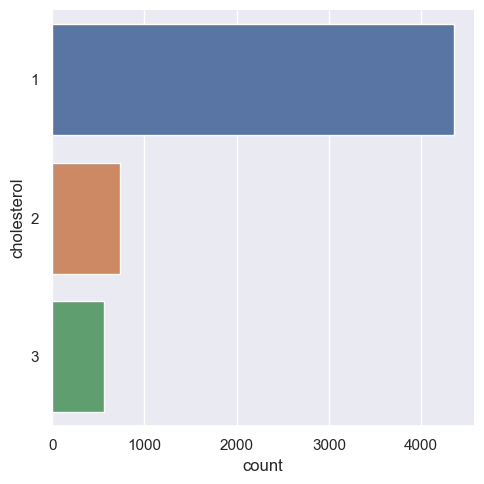

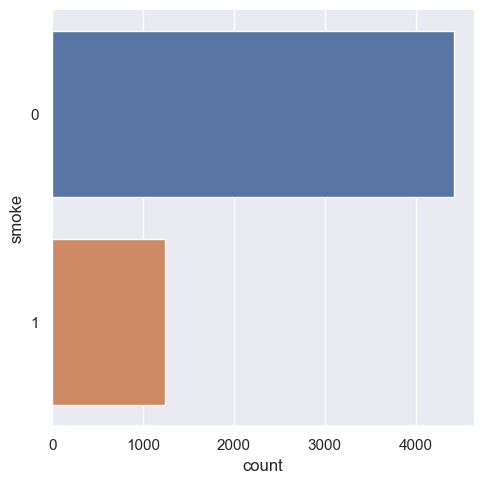

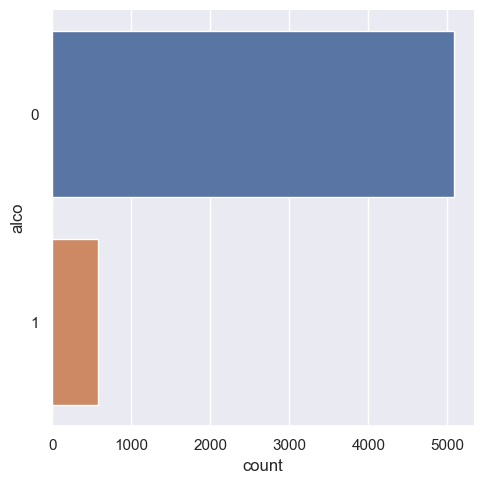

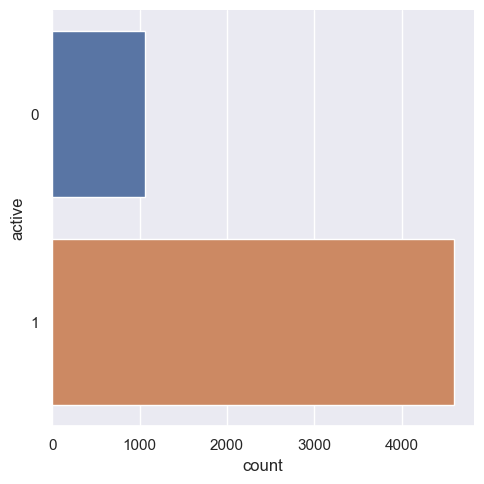

In [179]:
#Display the cat plots for all categorical predictors
sb.catplot(y = "cholesterol", data = X_mwo_test, kind = "count")
sb.catplot(y = "smoke", data = X_mwo_test, kind = "count")
sb.catplot(y = "alco", data = X_mwo_test, kind = "count")
sb.catplot(y = "active", data = X_mwo_test, kind = "count")

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7128467927195618

TPR (Test Dataset):  0.5406681190994916


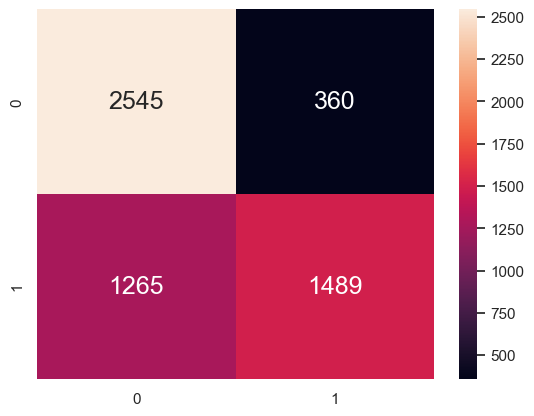

In [180]:
# Predict Response corresponding to Predictors
cardio_mwo_test_pred = dectree2.predict(X_mwo_test)

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree2.score(X_mwo_test, cardio_mwo_test))
print()

# Plot the Confusion Matrix for Train and Test
sb.heatmap(confusion_matrix(cardio_mwo_test, cardio_mwo_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Check the TPR on Test Set
print("TPR (Test Dataset): ", recall_score(cardio_mwo_test, cardio_mwo_test_pred))

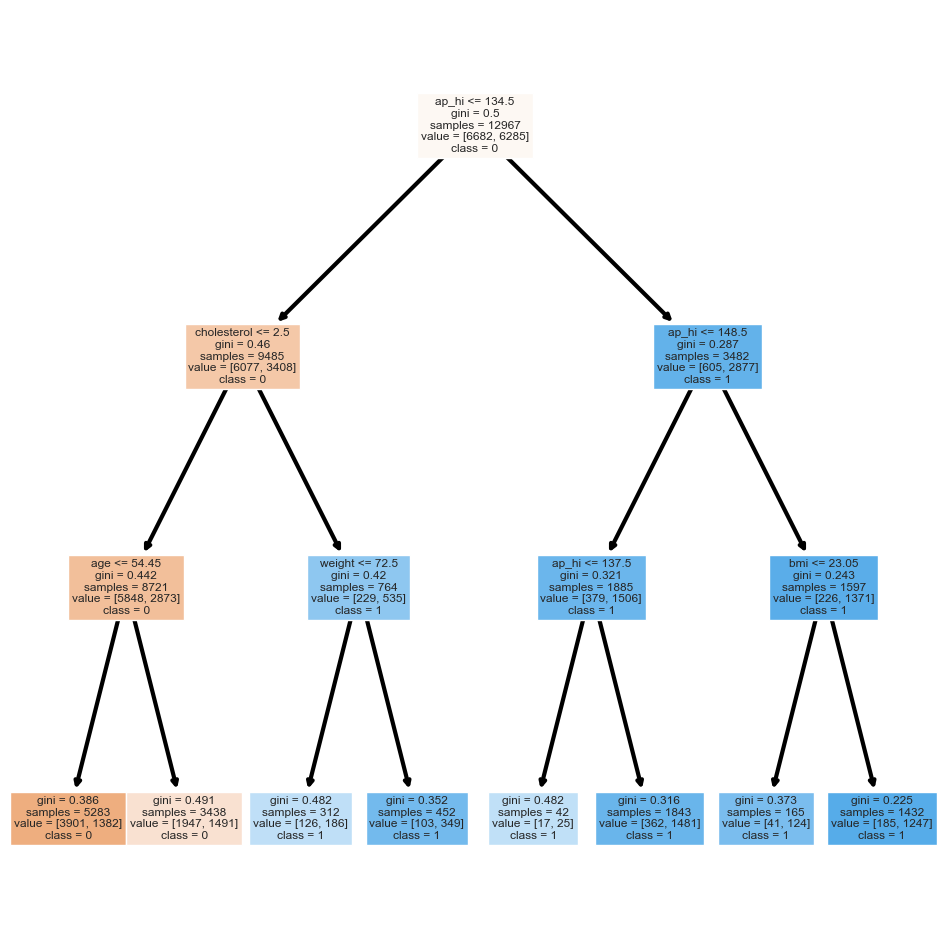

In [181]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree2, 
          feature_names = X_mwo_test.columns.tolist(),
          class_names = [str(x) for x in dectree2.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Using the test set, we observe that the results obtained are similar to the results from the train set, with significant variables being ap_hi, ap_lo, age and cholesterol. Therefore, the results obtained are reliable.

<a id='conc'></a>
# Conclusion

From the analysis we have done above, we observe that the significant factors related to Cardiovascular Disease in males and females are different. As seen in the multi-variate decision trees, the significant factors for each gender are as follows:

**Females: age, ap_hi, cholesterol**

**Males: age, ap_hi, ap_lo, cholesterol**

Therefore, we conclude that the gender-based model is effective and accurate in predicting Cardiovascular Disease.

Additionally, when comparing between models with and without outliers, while classification accuracy, tpr, and fnr are around the same, the model with outliers produced more consistent results of the significant variables for predicting cardiovascular disease for each gender. Moreover, we can also see that the female model is slightly more accurate than the male model in general. However, this could be due to the larger number of female data. Lastly, the multivariate decision tree is also more accurate than the univariate decision tree as it considers more than one feature.

For additional research in the future, a few areas could be developed further, such as adding more or modifying criteria to improve the classification accuracy. 
More work could also be done to obtain a more balanced dataset, balancing the amount of data for each gender since we obtained a dataset with much more female data than males.
